# AUDIO FEATURES COMPONENT 

In [629]:
import pandas as pd
import dtale
from sklearn.preprocessing import StandardScaler
import seaborn as sns 

import matplotlib.pyplot as plt
import numpy as np
# from yellowbrick.cluster import KElbowVisualizer
# from kneed import KneeLocator
from sklearn import cluster, metrics


In [630]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from math import pi
import plotly.offline as pyo
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale

# Importing & preliminary EDA 

In [631]:
spotify = pd.read_csv("/Users/alexjacob/Desktop/spotifycsvALLd")
spotify["year"] = 0

spotify

##IMPORT ALL CSV AND CONCAT, but till then 

title  \
0                                           Shape of You   
1                                     Castle on the Hill   
2      I Don’t Wanna Live Forever (Fifty Shades Darke...   
3                                                Starboy   
4                Rockabye (feat. Sean Paul & Anne-Marie)   
...                                                  ...   
46795                                            Heather   
46796                                    Run to Paradise   
46797                                Put Your Records On   
46798                                   I Like Me Better   
46799                        You Shook Me All Night Long   

                       artist                  songid                 Time  \
0                  Ed Sheeran  7qiZfU4dY1lWllzX7mPBI3  2017-01-19 00:00:00   
1                  Ed Sheeran  6PCUP3dWmTjcTtXY02oFdT  2017-01-19 00:00:00   
2          ZAYN, Taylor Swift  3NdDpSvN911VPGivFlV5d0  2017-01-19 00:00:00   
3       The Weeknd, Daft Punk  5aAx2yezTd8zXrkmtKl66Z  2017-01-19 00:00:00   
4                Clean Bandit  5knuzwU65gJK7IF5yJsuaW  2017-01-19 00:00:00   
...                       ...                     ...                  ...   
46795              Conan Gray  4xqrdfXkTW4T0RauPLv3WA  2021-07-08 00:00:00   
46796               Choirboys  6Amt2E3nanH9lhZnas9oOs  2021-07-08 00:00:00   
46797             Ritt Momney  6AGOKlMZWLCaEJGnaROtF9  2021-07-08 00:00:00   
46798                    Lauv  2P91MQbaiQOfbiz9VqhqKQ  2021-07-08 00:00:00   
46799                   AC/DC  2SiXAy7TuUkycRVbbWDEpo  2021-07-08 00:00:00   

       year  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
46795     0  
46796     0  
46797     0  
46798     0  
46799     0  

[46800 rows x 5 columns]

In [370]:
S1 = spotify.iloc[0:1000]
S2 = spotify.iloc[10000:11000]
S3 = spotify.iloc[20000:21000]
S4 = spotify.iloc[30000:31000]
S5 = spotify.iloc[40000:41000]
S6 = spotify.iloc[45000:46000]

In [371]:
s1 = pd.read_csv("/Users/alexjacob/Desktop/audfeatures0-1000")

s1000 = pd.read_csv("/Users/alexjacob/Desktop/audfeatures10000-110000")

s2000= pd.read_csv("/Users/alexjacob/Desktop/audfeatures20000-210000")

s3000 = pd.read_csv("/Users/alexjacob/Desktop/audfeatures30000-310000")

s4000 = pd.read_csv("/Users/alexjacob/Desktop/audfeatures40000-410000")

s5000 = pd.read_csv("/Users/alexjacob/Desktop/audfeatures45000-46000")

In [377]:
trip20 = pd.read_csv("//Users/alexjacob/Desktop/capstonecsvs/2020_hot100")
trip20["year"] = 2020

trip19 = pd.read_csv("//Users/alexjacob/Desktop/capstonecsvs/2019")
trip19["year"] = 2019

trip18 = pd.read_csv("//Users/alexjacob/Desktop/capstonecsvs/2018")
trip18["year"] = 2018
trip17 = pd.read_csv("//Users/alexjacob/Desktop/capstonecsvs/2017")
trip17["year"] = 2017
trip16 = pd.read_csv("//Users/alexjacob/Desktop/capstonecsvs/2016")
trip16["year"] = 2016
trip15 = pd.read_csv("//Users/alexjacob/Desktop/capstonecsvs/2015")
trip15["year"] = 2015
trip14 = pd.read_csv("//Users/alexjacob/Desktop/capstonecsvs/2014")
trip14["year"] = 2014
trip13 = pd.read_csv("//Users/alexjacob/Desktop/capstonecsvs/2013")
trip13["year"] = 2013
trip12 = pd.read_csv("//Users/alexjacob/Desktop/capstonecsvs/2012")
trip12["year"] = 2012



trip10 = pd.read_csv("//Users/alexjacob/Desktop/capstonecsvs/2010")
trip10["year"] = 2010
trip9 = pd.read_csv("//Users/alexjacob/Desktop/capstonecsvs/2009")
trip9["year"] = 2009
trip8 = pd.read_csv("//Users/alexjacob/Desktop/capstonecsvs/2008")
trip8["year"] = 2008
trip7 = pd.read_csv("//Users/alexjacob/Desktop/capstonecsvs/2007")
trip7["year"] = 2007
trip6 = pd.read_csv("//Users/alexjacob/Desktop/capstonecsvs/2006")
trip6["year"] = 2006


In [632]:
spotifydraft = pd.concat([S1,S2,S3,S4,S5,S6], axis = 0)

auddraft = pd.concat([s1,s1000,s2000,s3000,s4000,s5000], axis = 0)

In [633]:
test = pd.concat([trip20,trip19,trip18,trip17,trip16,trip15,trip14,trip13,trip12,trip10,trip9,trip8,trip7,trip6])

In [634]:
#now we need to normalise all of the features, and scale my tempo to something between 0 - 1 

In [635]:
##using TEST DATA from random samples - FOR OFFICIAL DELETE 

In [636]:
spotifydraft[:2]

title       artist                  songid  \
0        Shape of You   Ed Sheeran  7qiZfU4dY1lWllzX7mPBI3   
1  Castle on the Hill   Ed Sheeran  6PCUP3dWmTjcTtXY02oFdT   

                  Time  year  
0  2017-01-19 00:00:00     0  
1  2017-01-19 00:00:00     0

In [383]:
auddraft[:2]

URI  energy  loudness  speechiness  valence  liveness  \
0  7qiZfU4dY1lWllzX7mPBI3   0.652    -3.183       0.0802    0.931    0.0931   
1  6PCUP3dWmTjcTtXY02oFdT   0.834    -4.868       0.0989    0.471    0.1400   

     tempo  danceability  
0   95.977         0.825  
1  135.007         0.461

In [384]:
draft = pd.concat([spotifydraft,auddraft.set_index(spotifydraft.index)], axis = 1 )


In [385]:
test = test.drop(["key","mode","instrumentalness","time_signature"], axis = 1 )

In [386]:
draft = draft.drop(["URI","Time"], axis =1)

In [387]:
test=test.drop(["album","duration_ms"], axis=1)

In [388]:
test 

artist                                 track_name  \
0     Billie Eilish                                    bad guy   
1             Flume                               Rushing Back   
2           Mallrat                                    Charlie   
3       Tones And I                               Dance Monkey   
4      Denzel Curry  Bulls On Parade - triple j Like A Version   
..              ...                                        ...   
91       Red Riders                        Slide In Next To Me   
92        Pearl Jam                         World Wide Suicide   
93           Gossip             Standing in the Way of Control   
94       Audioslave                              Original Fire   
95  Blue King Brown                   Come and Check your Head   

                  track_id  danceability  energy  loudness  speechiness  \
0   2Fxmhks0bxGSBdJ92vM42m         0.701   0.425   -10.965       0.3750   
1   2zoNNEAyPK2OGDfajardlY         0.574   0.612    -4.741       0.0781   
2   4H24vduqzowuXiZ06CidCr         0.624   0.589    -6.799       0.0302   
3   1rgnBhdG2JDFTbYkYRZAku         0.825   0.593    -6.401       0.0988   
4   5FI3HtW6HGrQ0LCOBMbNo3         0.228   0.919    -7.953       0.3170   
..                     ...           ...     ...       ...          ...   
91  1vI75BTbqaOR9yd9413Fcy         0.691   0.402    -7.295       0.0352   
92  4mWYx9wadNBVrgcTRzHSkB         0.474   0.959    -3.865       0.0748   
93  7anI9BA3qzGFhVBaogZ7xd         0.698   0.907    -6.204       0.0295   
94  7kKf7Lr1xufPFlgwjIDFVz         0.640   0.950    -2.836       0.0550   
95  0nnrBiyc3fF3PS1m0K4Gq1         0.565   0.951    -3.038       0.1550   

    liveness  valence    tempo  year  
0     0.1000    0.562  135.128  2020  
1     0.1580    0.368  136.046  2020  
2     0.0974    0.286  115.090  2020  
3     0.1700    0.540   98.078  2020  
4     0.0878    0.696  176.192  2020  
..       ...      ...      ...   ...  
91    0.1130    0.672  134.985  2006  
92    0.2820    0.721  147.007  2006  
93    0.2410    0.950  118.341  2006  
94    0.3720    0.712  124.177  2006  
95    0.0267    0.860  102.477  2006  

[1345 rows x 11 columns]

In [389]:
test = test.rename(columns = {"track_name":"title","track_id":"songid"})

In [390]:
test

artist                                      title  \
0     Billie Eilish                                    bad guy   
1             Flume                               Rushing Back   
2           Mallrat                                    Charlie   
3       Tones And I                               Dance Monkey   
4      Denzel Curry  Bulls On Parade - triple j Like A Version   
..              ...                                        ...   
91       Red Riders                        Slide In Next To Me   
92        Pearl Jam                         World Wide Suicide   
93           Gossip             Standing in the Way of Control   
94       Audioslave                              Original Fire   
95  Blue King Brown                   Come and Check your Head   

                    songid  danceability  energy  loudness  speechiness  \
0   2Fxmhks0bxGSBdJ92vM42m         0.701   0.425   -10.965       0.3750   
1   2zoNNEAyPK2OGDfajardlY         0.574   0.612    -4.741       0.0781   
2   4H24vduqzowuXiZ06CidCr         0.624   0.589    -6.799       0.0302   
3   1rgnBhdG2JDFTbYkYRZAku         0.825   0.593    -6.401       0.0988   
4   5FI3HtW6HGrQ0LCOBMbNo3         0.228   0.919    -7.953       0.3170   
..                     ...           ...     ...       ...          ...   
91  1vI75BTbqaOR9yd9413Fcy         0.691   0.402    -7.295       0.0352   
92  4mWYx9wadNBVrgcTRzHSkB         0.474   0.959    -3.865       0.0748   
93  7anI9BA3qzGFhVBaogZ7xd         0.698   0.907    -6.204       0.0295   
94  7kKf7Lr1xufPFlgwjIDFVz         0.640   0.950    -2.836       0.0550   
95  0nnrBiyc3fF3PS1m0K4Gq1         0.565   0.951    -3.038       0.1550   

    liveness  valence    tempo  year  
0     0.1000    0.562  135.128  2020  
1     0.1580    0.368  136.046  2020  
2     0.0974    0.286  115.090  2020  
3     0.1700    0.540   98.078  2020  
4     0.0878    0.696  176.192  2020  
..       ...      ...      ...   ...  
91    0.1130    0.672  134.985  2006  
92    0.2820    0.721  147.007  2006  
93    0.2410    0.950  118.341  2006  
94    0.3720    0.712  124.177  2006  
95    0.0267    0.860  102.477  2006  

[1345 rows x 11 columns]

In [391]:
draft

title  \
0                                           Shape of You   
1                                     Castle on the Hill   
2      I Don’t Wanna Live Forever (Fifty Shades Darke...   
3                                                Starboy   
4                Rockabye (feat. Sean Paul & Anne-Marie)   
...                                                  ...   
45995                                          telepatía   
45996                                  Commitment Issues   
45997                   Yeah! (feat. Lil Jon & Ludacris)   
45998                              when the party's over   
45999                                   Do I Wanna Know?   

                       artist                  songid  year  energy  loudness  \
0                  Ed Sheeran  7qiZfU4dY1lWllzX7mPBI3     0   0.652    -3.183   
1                  Ed Sheeran  6PCUP3dWmTjcTtXY02oFdT     0   0.834    -4.868   
2          ZAYN, Taylor Swift  3NdDpSvN911VPGivFlV5d0     0   0.451    -8.374   
3       The Weeknd, Daft Punk  5aAx2yezTd8zXrkmtKl66Z     0   0.594    -7.028   
4                Clean Bandit  5knuzwU65gJK7IF5yJsuaW     0   0.763    -4.068   
...                       ...                     ...   ...     ...       ...   
45995              Kali Uchis  6tDDoYIxWvMLTdKpjFkc1B     0   0.524    -9.016   
45996             Central Cee  0UCKUJU94sx8XBQnaNsRkB     0   0.710    -6.403   
45997                   Usher  5rb9QrpfcKFHM1EUbSIurX     0   0.791    -4.699   
45998           Billie Eilish  43zdsphuZLzwA9k4DJhU0I     0   0.111   -14.084   
45999          Arctic Monkeys  3rq5w4bQGigXOfdN30ATJt     0   0.532    -7.596   

       speechiness  valence  liveness    tempo  danceability  
0           0.0802   0.9310    0.0931   95.977         0.825  
1           0.0989   0.4710    0.1400  135.007         0.461  
2           0.0585   0.0862    0.3250  117.973         0.735  
3           0.2820   0.5350    0.1340  186.054         0.681  
4           0.0523   0.7420    0.1800  101.965         0.720  
...            ...      ...       ...      ...           ...  
45995       0.0502   0.5530    0.2030   83.970         0.653  
45996       0.2950   0.7950    0.3390  147.171         0.800  
45997       0.1120   0.5830    0.0388  105.018         0.894  
45998       0.0972   0.1980    0.0897   82.642         0.367  
45999       0.0323   0.4050    0.2170   85.030         0.548  

[6000 rows x 11 columns]

In [392]:
sdraft = pd.concat([draft,test], sort = True)

In [393]:
sdraft

artist  danceability  energy  liveness  loudness  \
0               Ed Sheeran         0.825   0.652    0.0931    -3.183   
1               Ed Sheeran         0.461   0.834    0.1400    -4.868   
2       ZAYN, Taylor Swift         0.735   0.451    0.3250    -8.374   
3    The Weeknd, Daft Punk         0.681   0.594    0.1340    -7.028   
4             Clean Bandit         0.720   0.763    0.1800    -4.068   
..                     ...           ...     ...       ...       ...   
91              Red Riders         0.691   0.402    0.1130    -7.295   
92               Pearl Jam         0.474   0.959    0.2820    -3.865   
93                  Gossip         0.698   0.907    0.2410    -6.204   
94              Audioslave         0.640   0.950    0.3720    -2.836   
95         Blue King Brown         0.565   0.951    0.0267    -3.038   

                    songid  speechiness    tempo  \
0   7qiZfU4dY1lWllzX7mPBI3       0.0802   95.977   
1   6PCUP3dWmTjcTtXY02oFdT       0.0989  135.007   
2   3NdDpSvN911VPGivFlV5d0       0.0585  117.973   
3   5aAx2yezTd8zXrkmtKl66Z       0.2820  186.054   
4   5knuzwU65gJK7IF5yJsuaW       0.0523  101.965   
..                     ...          ...      ...   
91  1vI75BTbqaOR9yd9413Fcy       0.0352  134.985   
92  4mWYx9wadNBVrgcTRzHSkB       0.0748  147.007   
93  7anI9BA3qzGFhVBaogZ7xd       0.0295  118.341   
94  7kKf7Lr1xufPFlgwjIDFVz       0.0550  124.177   
95  0nnrBiyc3fF3PS1m0K4Gq1       0.1550  102.477   

                                                title  valence  year  
0                                        Shape of You   0.9310     0  
1                                  Castle on the Hill   0.4710     0  
2   I Don’t Wanna Live Forever (Fifty Shades Darke...   0.0862     0  
3                                             Starboy   0.5350     0  
4             Rockabye (feat. Sean Paul & Anne-Marie)   0.7420     0  
..                                                ...      ...   ...  
91                                Slide In Next To Me   0.6720  2006  
92                                 World Wide Suicide   0.7210  2006  
93                     Standing in the Way of Control   0.9500  2006  
94                                      Original Fire   0.7120  2006  
95                           Come and Check your Head   0.8600  2006  

[7345 rows x 11 columns]

In [394]:
sdraft.isnull().sum()

artist          0
danceability    0
energy          0
liveness        0
loudness        0
songid          0
speechiness     0
tempo           0
title           0
valence         0
year            0
dtype: int64

In [395]:
#now i need to scale the features

In [396]:
sdraftmin = sdraft.copy()

In [397]:
scaler = StandardScaler()

In [398]:
features = ["energy", "loudness", "speechiness", "valence","liveness","tempo","danceability"]
autoscaler = StandardScaler()
sdraft[features] = autoscaler.fit_transform(sdraft[features])

In [399]:
sdraft

artist  danceability    energy  liveness  loudness  \
0               Ed Sheeran      1.192844  0.017077 -0.613969  1.379055   
1               Ed Sheeran     -1.342555  1.088377 -0.249905  0.646413   
2       ZAYN, Taylor Swift      0.565960 -1.166063  1.186168 -0.878003   
3    The Weeknd, Daft Punk      0.189829 -0.324327 -0.296480 -0.292759   
4             Clean Bandit      0.461479  0.670452  0.060597  0.994255   
..                     ...           ...       ...       ...       ...   
91              Red Riders      0.259483 -1.454490 -0.459494 -0.408851   
92               Pearl Jam     -1.252005  1.824161  0.852378  1.082520   
93                  Gossip      0.308241  1.518075  0.534113  0.065518   
94              Audioslave     -0.095751  1.771184  1.551008  1.529931   
95         Blue King Brown     -0.618155  1.777070 -1.129403  1.442101   

                    songid  speechiness     tempo  \
0   7qiZfU4dY1lWllzX7mPBI3    -0.187752 -0.858429   
1   6PCUP3dWmTjcTtXY02oFdT     0.016366  0.578495   
2   3NdDpSvN911VPGivFlV5d0    -0.424616 -0.048626   
3   5aAx2yezTd8zXrkmtKl66Z     2.014975  2.457835   
4   5knuzwU65gJK7IF5yJsuaW    -0.492291 -0.637975   
..                     ...          ...       ...   
91  1vI75BTbqaOR9yd9413Fcy    -0.678945  0.577685   
92  4mWYx9wadNBVrgcTRzHSkB    -0.246695  1.020286   
93  7anI9BA3qzGFhVBaogZ7xd    -0.741162 -0.035078   
94  7kKf7Lr1xufPFlgwjIDFVz    -0.462820  0.179779   
95  0nnrBiyc3fF3PS1m0K4Gq1     0.628720 -0.619125   

                                                title   valence  year  
0                                        Shape of You  2.016553     0  
1                                  Castle on the Hill -0.100360     0  
2   I Don’t Wanna Live Forever (Fifty Shades Darke... -1.871204     0  
3                                             Starboy  0.194167     0  
4             Rockabye (feat. Sean Paul & Anne-Marie)  1.146778     0  
..                                                ...       ...   ...  
91                                Slide In Next To Me  0.824639  2006  
92                                 World Wide Suicide  1.050136  2006  
93                     Standing in the Way of Control  2.103991  2006  
94                                      Original Fire  1.008719  2006  
95                           Come and Check your Head  1.689813  2006  

[7345 rows x 11 columns]

In [400]:
#we will also try with minmax scaler

In [403]:
minmax = MinMaxScaler()


In [404]:
sdraftmin[features] = minmax.fit_transform(sdraftmin[features])


In [405]:
sdraftmin[:2]

artist  danceability    energy  liveness  loudness  \
0   Ed Sheeran      0.834532  0.636809  0.076271  0.856359   
1   Ed Sheeran      0.398082  0.830653  0.125340  0.773100   

                   songid  speechiness     tempo               title  \
0  7qiZfU4dY1lWllzX7mPBI3     0.106625  0.265286        Shape of You   
1  6PCUP3dWmTjcTtXY02oFdT     0.140943  0.516417  Castle on the Hill   

    valence  year  
0  0.950148     0  
1  0.462240     0

In [406]:
def correlation_heat_map(sdraft):
    corrs = sdraft.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(11,7))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

# sdraft_with_target = sdraft.copy()
# sdraft_with_target['MEDV'] = y
# correlation_heat_map(sdraft_with_target)


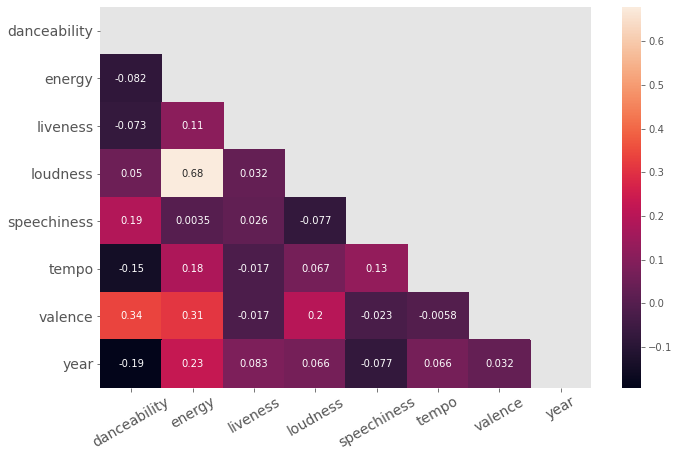

In [407]:
correlation_heat_map(sdraft)

In [408]:
#lets explore the data

In [409]:
sdraft["artist"].value_counts()

 Ed Sheeran       177
 Post Malone      107
 Billie Eilish    100
 Juice WRLD        88
 Ariana Grande     87
                 ... 
Augie March         1
Odd Mob             1
 Grey, Bahari       1
 The Verve          1
Ratatat             1
Name: artist, Length: 1131, dtype: int64

In [410]:
#visualise^^

In [411]:
sdraft["title"].value_counts()

Riptide                           32
Say You Won't Let Go              30
Mr. Brightside                    30
Shape of You                      29
Closer                            26
                                  ..
Cool As Hell                       1
Good Years                         1
Ghost Town                         1
Something Is Not Right With Me     1
Good Thing (with Kehlani)          1
Name: title, Length: 2224, dtype: int64

In [412]:
#trying a variety of models, from knee, to elbow to find how many clusters

In [413]:
#first we need to split the df into just the audio components of a song

In [414]:
audio = sdraft[["energy", "loudness", "speechiness", "valence","liveness","tempo","danceability"]]

In [415]:
audio2 = sdraftmin[["energy", "loudness", "speechiness", "valence","liveness","tempo","danceability"]]

In [416]:
sdraft

artist  danceability    energy  liveness  loudness  \
0               Ed Sheeran      1.192844  0.017077 -0.613969  1.379055   
1               Ed Sheeran     -1.342555  1.088377 -0.249905  0.646413   
2       ZAYN, Taylor Swift      0.565960 -1.166063  1.186168 -0.878003   
3    The Weeknd, Daft Punk      0.189829 -0.324327 -0.296480 -0.292759   
4             Clean Bandit      0.461479  0.670452  0.060597  0.994255   
..                     ...           ...       ...       ...       ...   
91              Red Riders      0.259483 -1.454490 -0.459494 -0.408851   
92               Pearl Jam     -1.252005  1.824161  0.852378  1.082520   
93                  Gossip      0.308241  1.518075  0.534113  0.065518   
94              Audioslave     -0.095751  1.771184  1.551008  1.529931   
95         Blue King Brown     -0.618155  1.777070 -1.129403  1.442101   

                    songid  speechiness     tempo  \
0   7qiZfU4dY1lWllzX7mPBI3    -0.187752 -0.858429   
1   6PCUP3dWmTjcTtXY02oFdT     0.016366  0.578495   
2   3NdDpSvN911VPGivFlV5d0    -0.424616 -0.048626   
3   5aAx2yezTd8zXrkmtKl66Z     2.014975  2.457835   
4   5knuzwU65gJK7IF5yJsuaW    -0.492291 -0.637975   
..                     ...          ...       ...   
91  1vI75BTbqaOR9yd9413Fcy    -0.678945  0.577685   
92  4mWYx9wadNBVrgcTRzHSkB    -0.246695  1.020286   
93  7anI9BA3qzGFhVBaogZ7xd    -0.741162 -0.035078   
94  7kKf7Lr1xufPFlgwjIDFVz    -0.462820  0.179779   
95  0nnrBiyc3fF3PS1m0K4Gq1     0.628720 -0.619125   

                                                title   valence  year  
0                                        Shape of You  2.016553     0  
1                                  Castle on the Hill -0.100360     0  
2   I Don’t Wanna Live Forever (Fifty Shades Darke... -1.871204     0  
3                                             Starboy  0.194167     0  
4             Rockabye (feat. Sean Paul & Anne-Marie)  1.146778     0  
..                                                ...       ...   ...  
91                                Slide In Next To Me  0.824639  2006  
92                                 World Wide Suicide  1.050136  2006  
93                     Standing in the Way of Control  2.103991  2006  
94                                      Original Fire  1.008719  2006  
95                           Come and Check your Head  1.689813  2006  

[7345 rows x 11 columns]

In [417]:
audio

energy  loudness  speechiness   valence  liveness     tempo  \
0   0.017077  1.379055    -0.187752  2.016553 -0.613969 -0.858429   
1   1.088377  0.646413     0.016366 -0.100360 -0.249905  0.578495   
2  -1.166063 -0.878003    -0.424616 -1.871204  1.186168 -0.048626   
3  -0.324327 -0.292759     2.014975  0.194167 -0.296480  2.457835   
4   0.670452  0.994255    -0.492291  1.146778  0.060597 -0.637975   
..       ...       ...          ...       ...       ...       ...   
91 -1.454490 -0.408851    -0.678945  0.824639 -0.459494  0.577685   
92  1.824161  1.082520    -0.246695  1.050136  0.852378  1.020286   
93  1.518075  0.065518    -0.741162  2.103991  0.534113 -0.035078   
94  1.771184  1.529931    -0.462820  1.008719  1.551008  0.179779   
95  1.777070  1.442101     0.628720  1.689813 -1.129403 -0.619125   

    danceability  
0       1.192844  
1      -1.342555  
2       0.565960  
3       0.189829  
4       0.461479  
..           ...  
91      0.259483  
92     -1.252005  
93      0.308241  
94     -0.095751  
95     -0.618155  

[7345 rows x 7 columns]

# PCA 

In [418]:
from sklearn.decomposition import PCA


In [419]:
pca = PCA()

In [420]:
pca.fit(audio)

PCA()

In [421]:
#lets check the explained variance

In [422]:
exvar = pca.explained_variance_ratio_
exvar

array([0.26862329, 0.19594104, 0.16237401, 0.14373462, 0.11167433,
       0.08067572, 0.03697699])

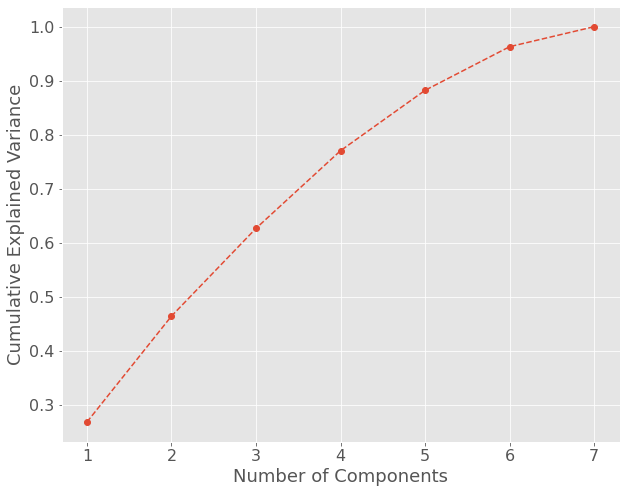

In [423]:
fig = plt.figure(figsize=(10,8))
plt.plot(range(1, len(audio.columns)+1), exvar.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components', fontsize=18)
plt.ylabel('Cumulative Explained Variance',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [424]:
for i, exp_var in enumerate(exvar.cumsum()):
    if exp_var >= 0.8:
        n_comps = i + 1
        break
print("Number of components:", n_comps)
pca = PCA(n_components=n_comps)
pca.fit(audio)
scores_pca = pca.transform(audio)

Number of components: 5


In [425]:
#now for minmax

In [426]:
pca.fit(audio2)
scores_pcamin = pca.transform(audio2)

In [427]:
audio2

energy  loudness  speechiness   valence  liveness     tempo  \
0   0.636809  0.856359     0.106625  0.950148  0.076271  0.265286   
1   0.830653  0.773100     0.140943  0.462240  0.125340  0.516417   
2   0.422729  0.599862     0.066801  0.054094  0.318895  0.406815   
3   0.575035  0.666370     0.476968  0.530123  0.119063  0.844869   
4   0.755032  0.812630     0.055423  0.749682  0.167190  0.303815   
..       ...       ...          ...       ...       ...       ...   
91  0.370540  0.653177     0.024041  0.675435  0.097091  0.516276   
92  0.963787  0.822660     0.096715  0.727408  0.273907  0.593629   
93  0.908403  0.707086     0.013580  0.970301  0.231011  0.409183   
94  0.954202  0.873505     0.060378  0.717862  0.368069  0.446734   
95  0.955267  0.863524     0.243898  0.874841  0.006801  0.307109   

    danceability  
0       0.834532  
1       0.398082  
2       0.726619  
3       0.661871  
4       0.708633  
..           ...  
91      0.673861  
92      0.413669  
93      0.682254  
94      0.612710  
95      0.522782  

[7345 rows x 7 columns]

In [428]:
#to be used later !

# How many clusters?

In [429]:
#we can try establish this by visually inspecting first; 

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.17371381076822143


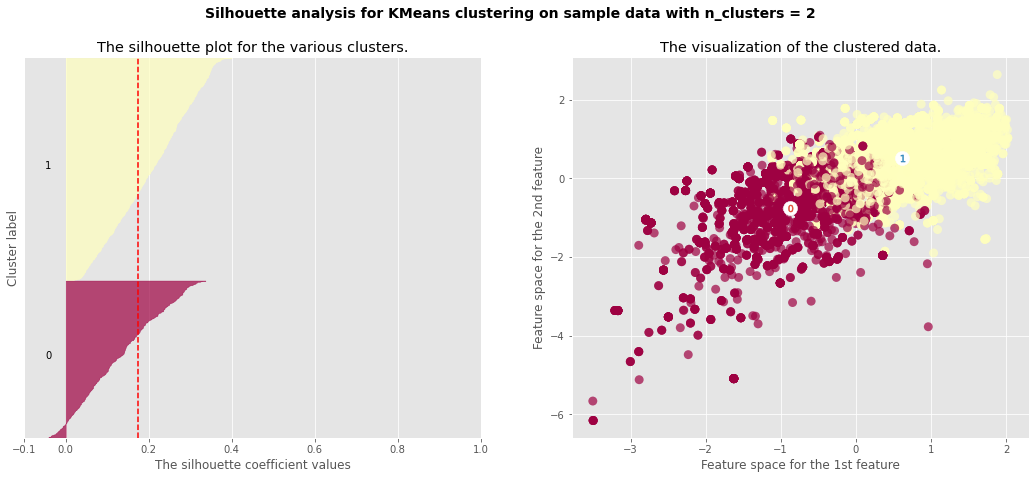

For n_clusters = 3 The average silhouette_score is : 0.19081647818777303


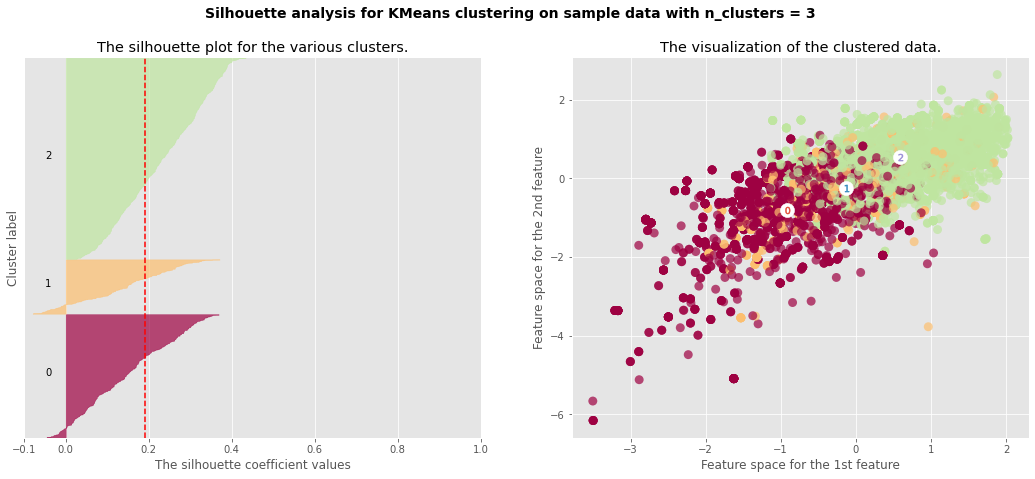

For n_clusters = 4 The average silhouette_score is : 0.17472981927217543


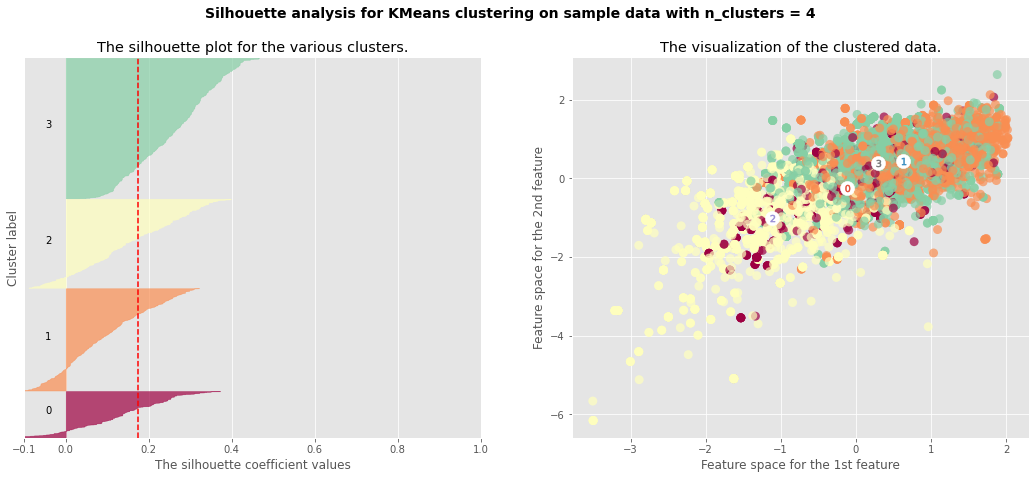

For n_clusters = 5 The average silhouette_score is : 0.18746328737299245


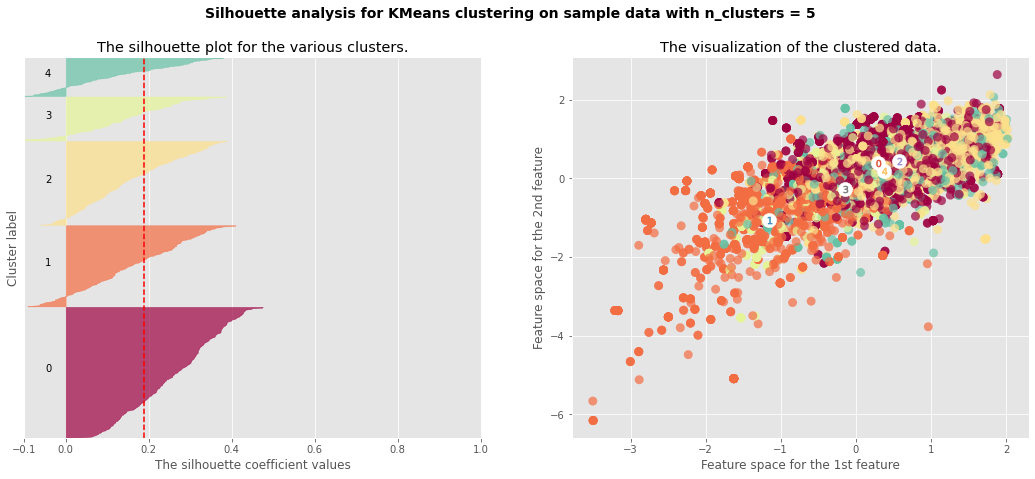

For n_clusters = 6 The average silhouette_score is : 0.16435975545035694


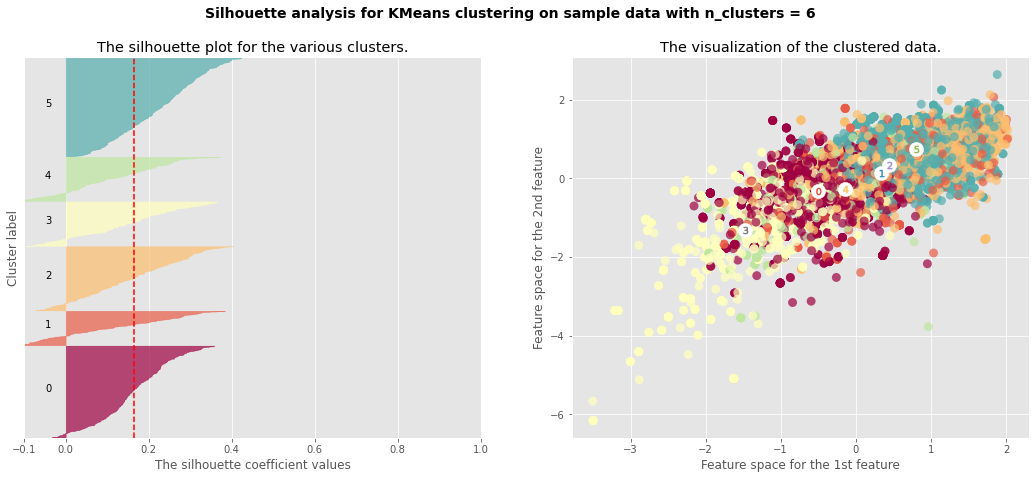

For n_clusters = 7 The average silhouette_score is : 0.15250803254315656


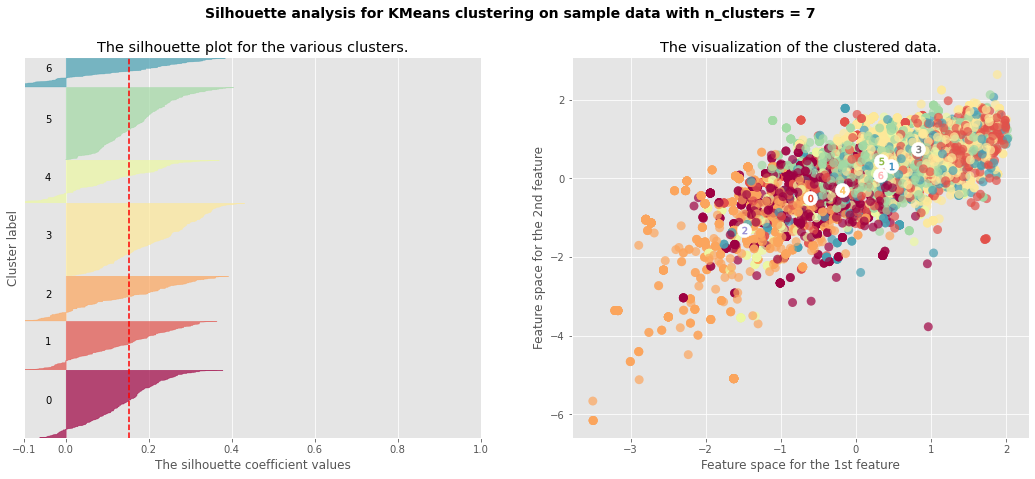

For n_clusters = 8 The average silhouette_score is : 0.16035762313398655


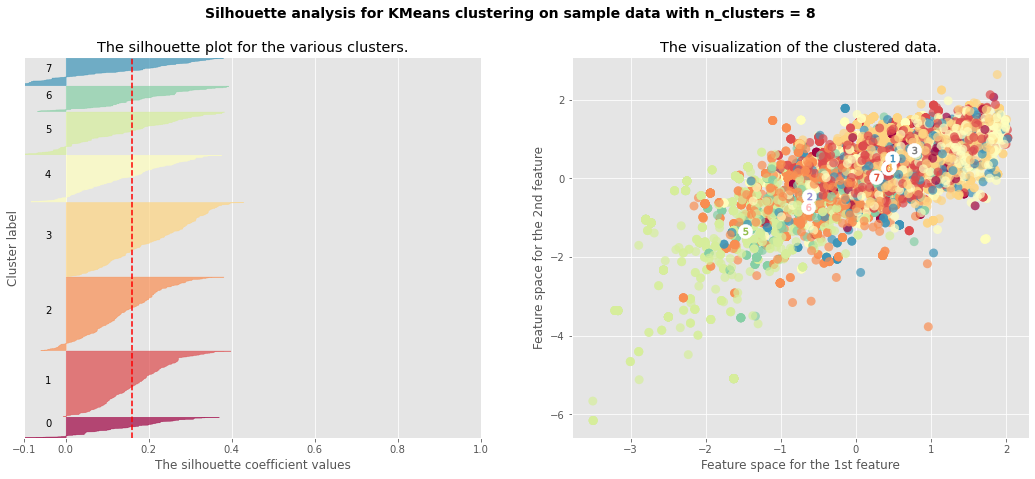

For n_clusters = 9 The average silhouette_score is : 0.15360543523755324


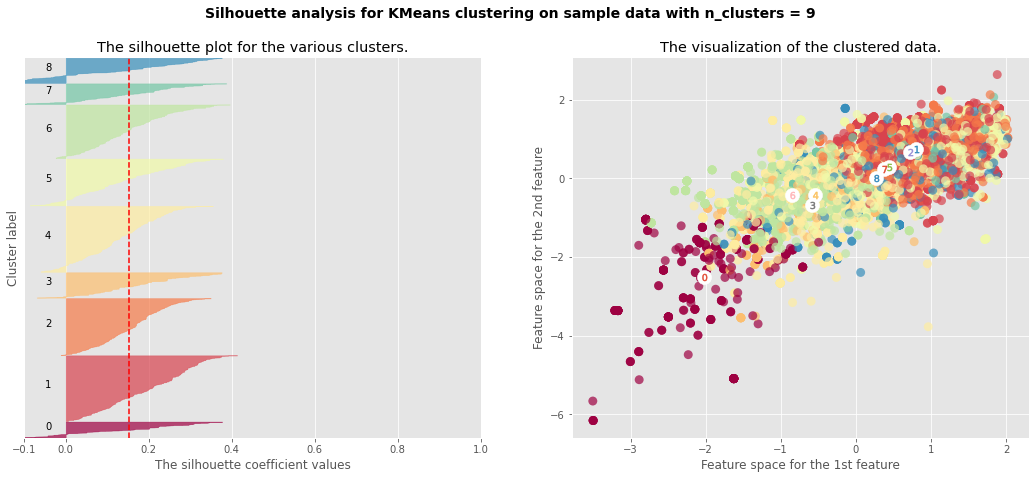

For n_clusters = 10 The average silhouette_score is : 0.1545857133906946


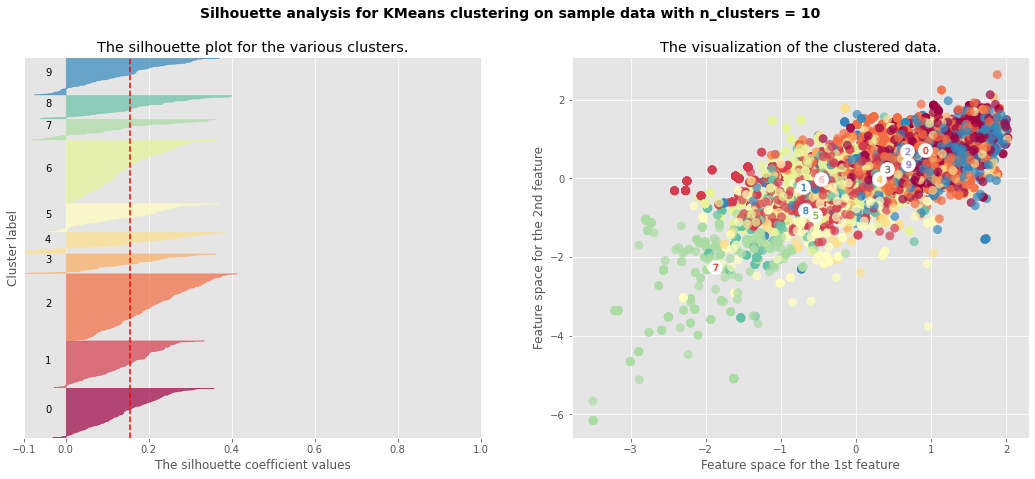

In [430]:

print(__doc__)

cmap = cm.get_cmap("Spectral")

X = audio.values
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cmap(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='o', s=80, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [431]:
#from this, visually i interpret 10 to be the ideal cluster amount due to the equal thickness of the silhouttes score

In [432]:
#now lets try if we min/maxxed instead

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.19310165276648436


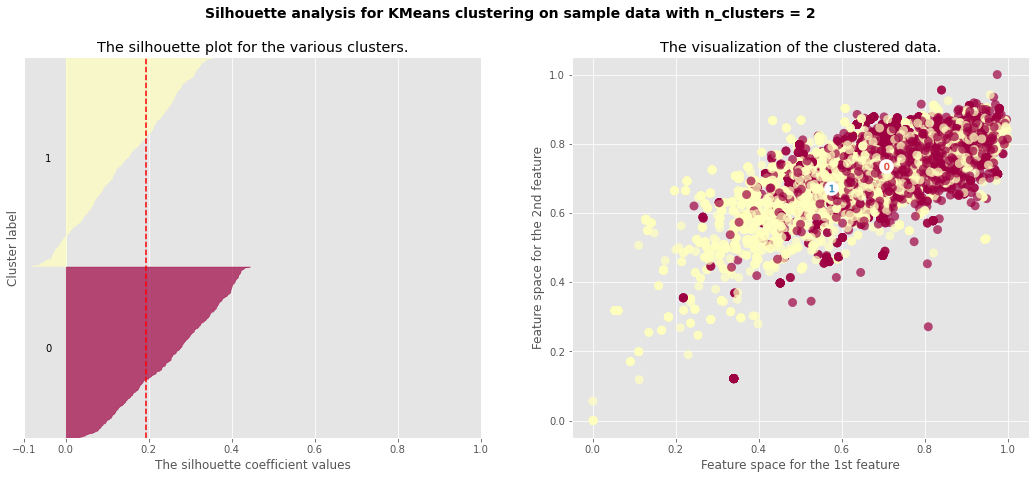

For n_clusters = 3 The average silhouette_score is : 0.1833322197735842


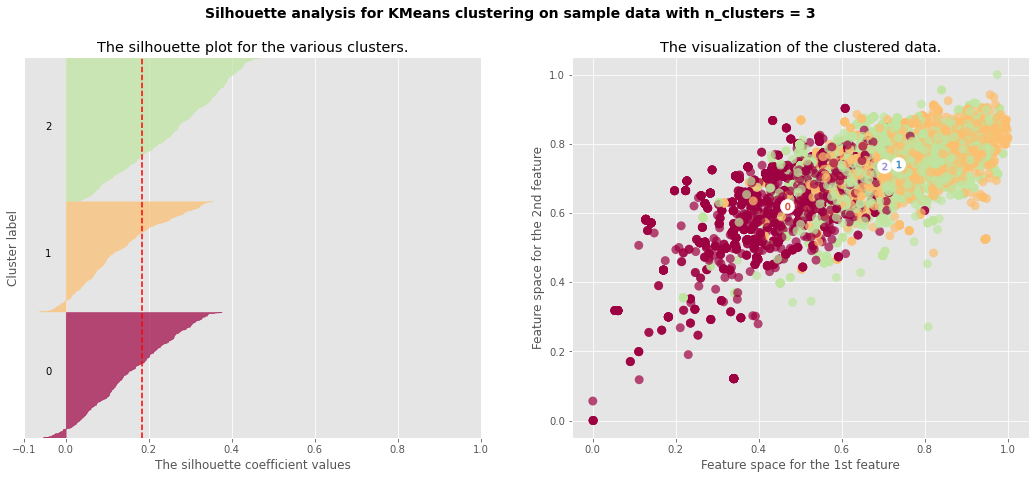

For n_clusters = 4 The average silhouette_score is : 0.19364508685232362


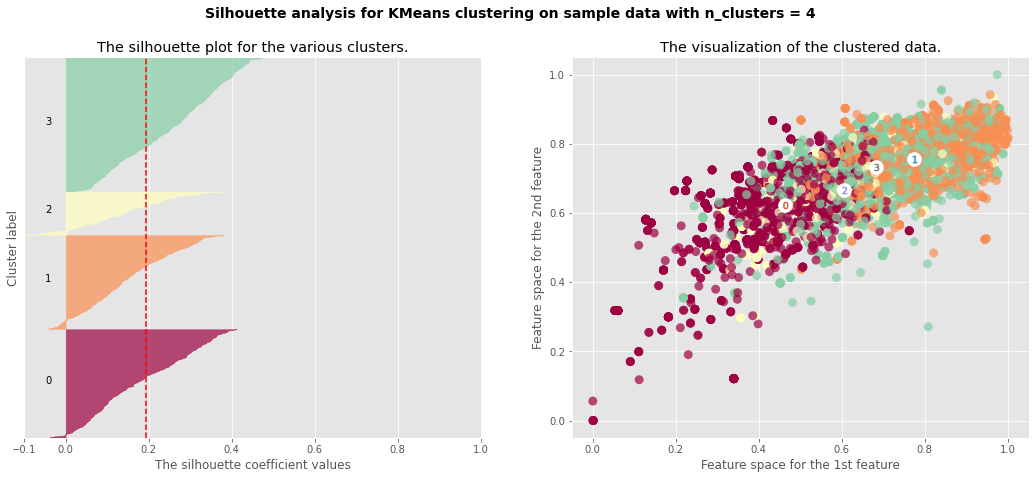

For n_clusters = 5 The average silhouette_score is : 0.16890083854896284


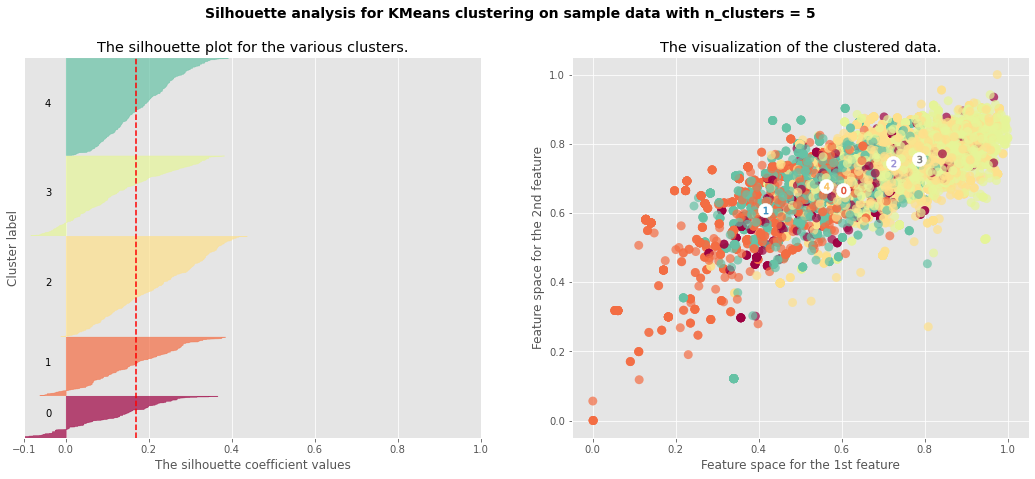

For n_clusters = 6 The average silhouette_score is : 0.169502958009919


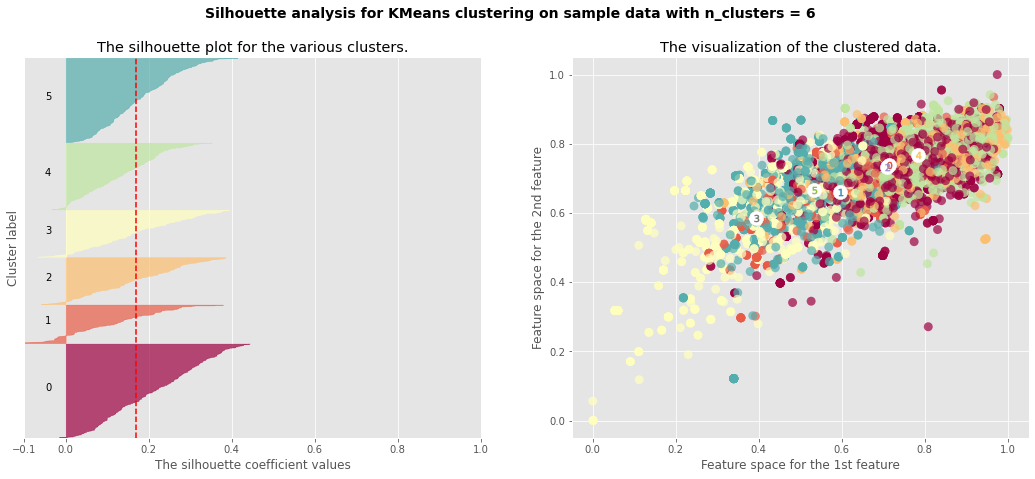

For n_clusters = 7 The average silhouette_score is : 0.16512642493654572


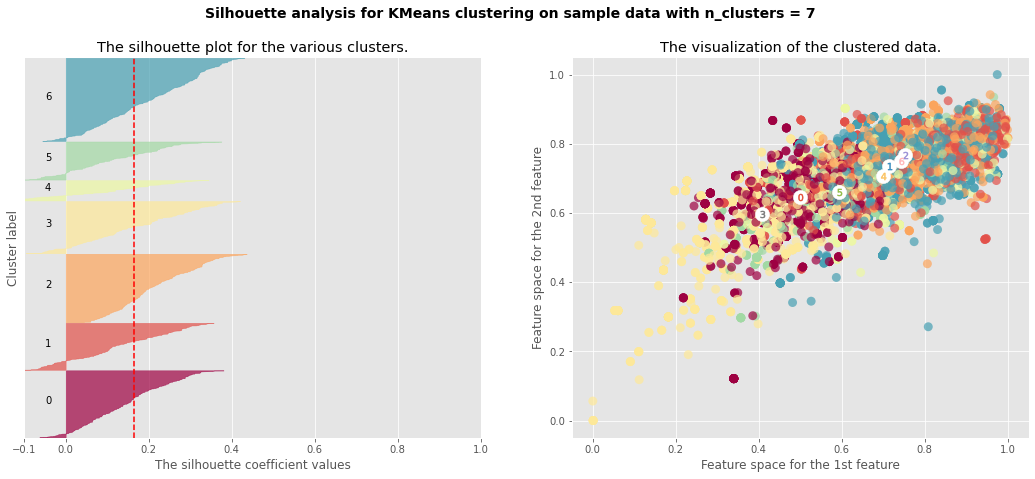

For n_clusters = 8 The average silhouette_score is : 0.17774766965709113


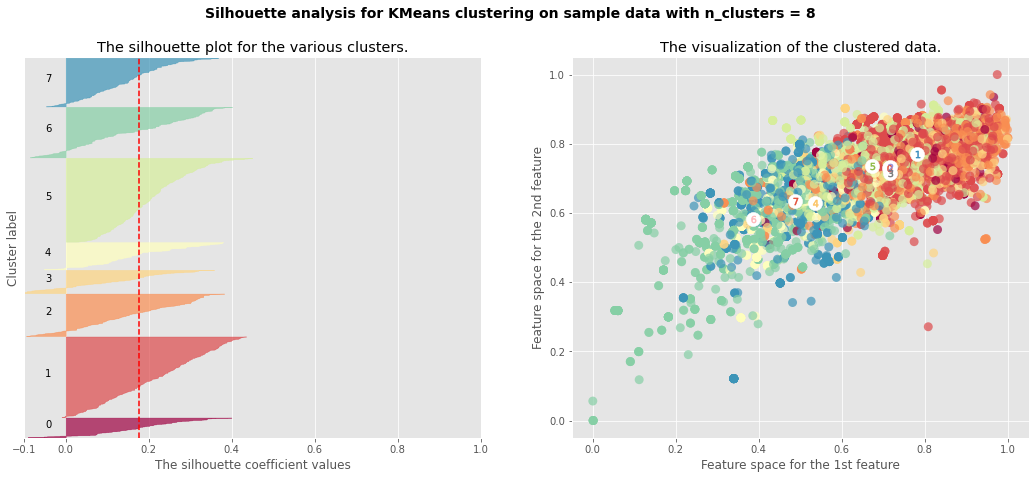

For n_clusters = 9 The average silhouette_score is : 0.16263270165201743


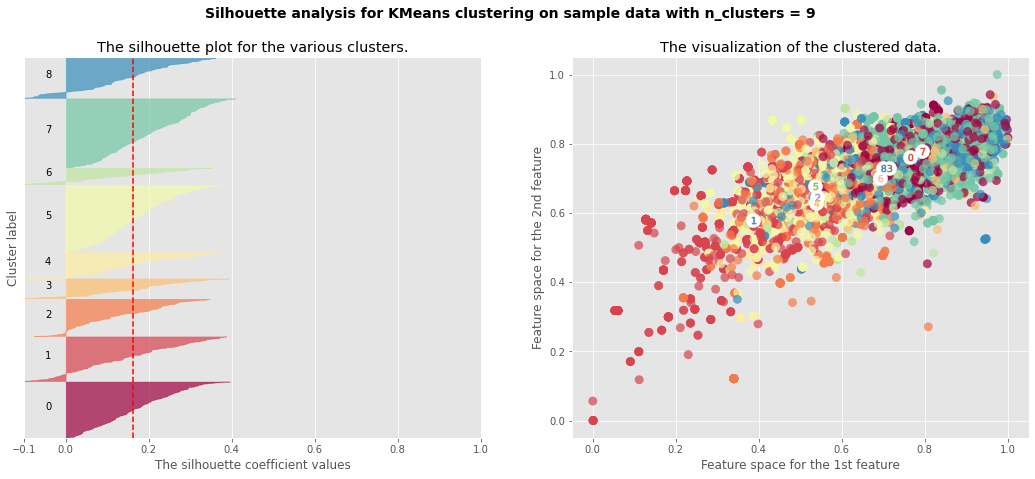

For n_clusters = 10 The average silhouette_score is : 0.16908944359050732


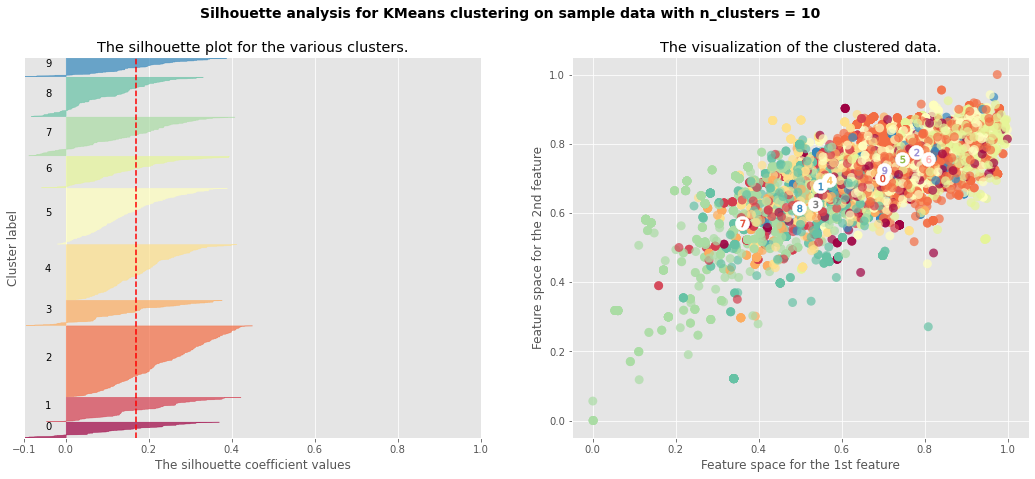

In [433]:

print(__doc__)

cmap = cm.get_cmap("Spectral")

X = audio2.values
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cmap(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='o', s=80, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

# Visualising how PCA affects the clustering

In [434]:
#now lets inspect if we use our pca values - clusters should be better visualised now 

In [435]:
pcadf = pd.DataFrame(scores_pca, columns = ["pC1","pC2","pC3","pC4","pC5"])

In [436]:
pcadfmin = pd.DataFrame(scores_pcamin, columns = ["pC1","pC2","pC3","pC4","pC5"])

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.1981102817548748


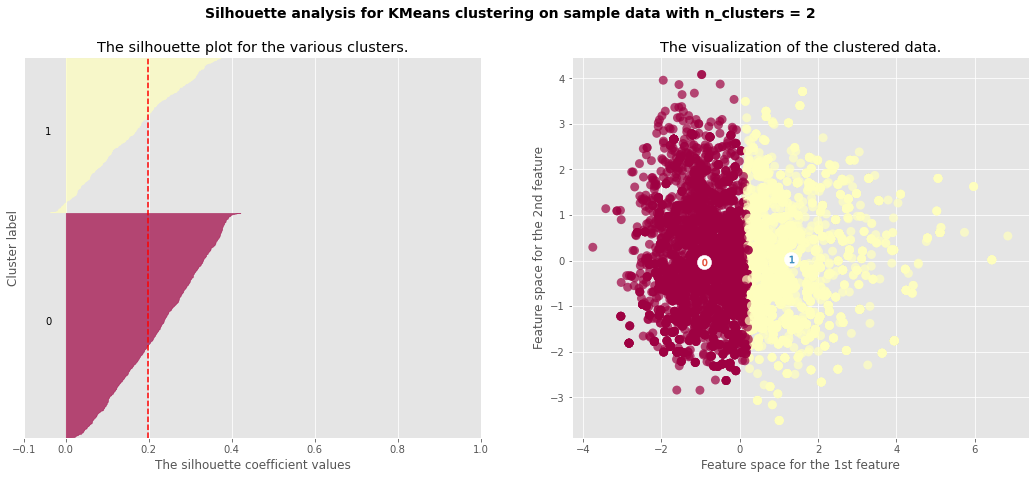

For n_clusters = 3 The average silhouette_score is : 0.18401768140493735


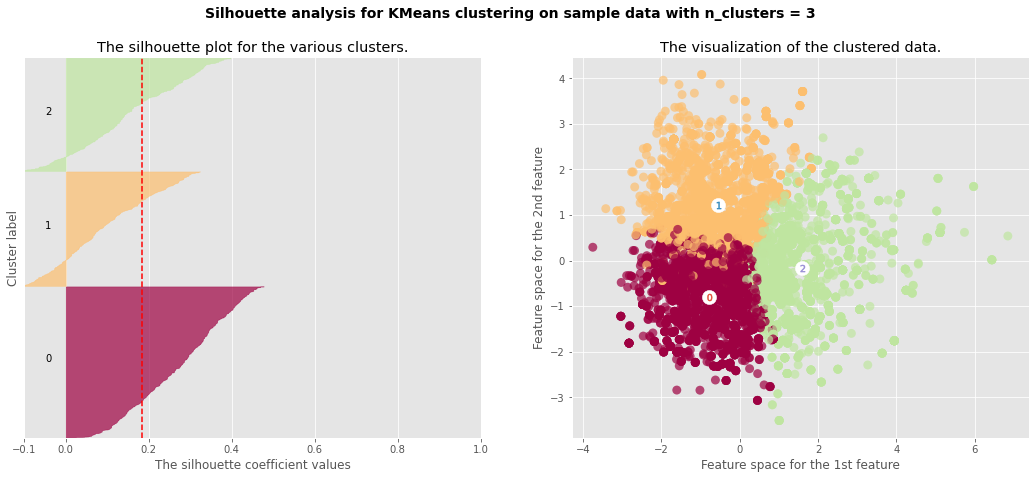

For n_clusters = 4 The average silhouette_score is : 0.20662925210541572


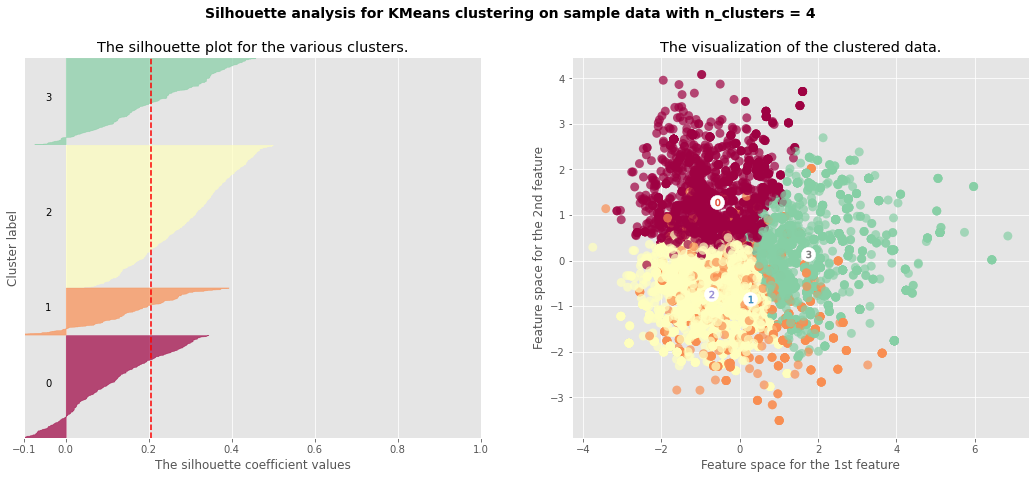

For n_clusters = 5 The average silhouette_score is : 0.22301780726381992


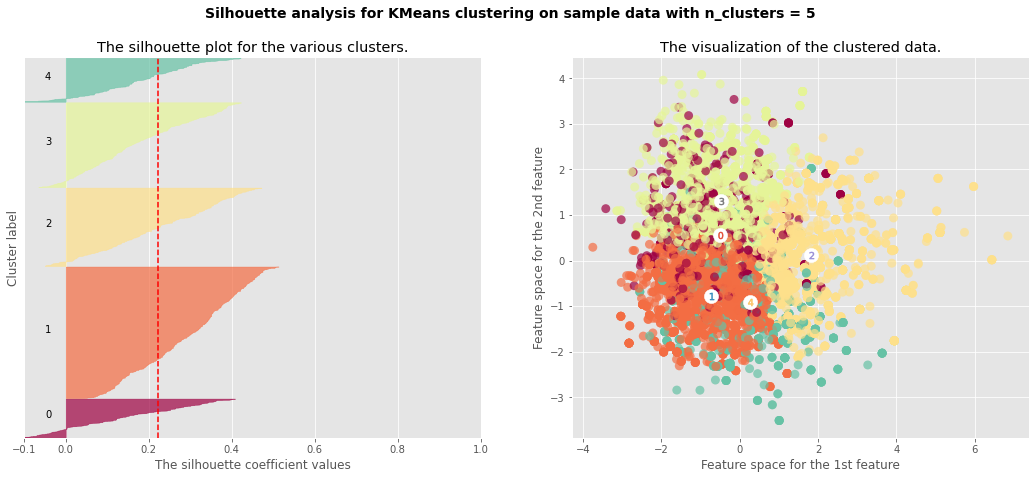

For n_clusters = 6 The average silhouette_score is : 0.19504086587258906


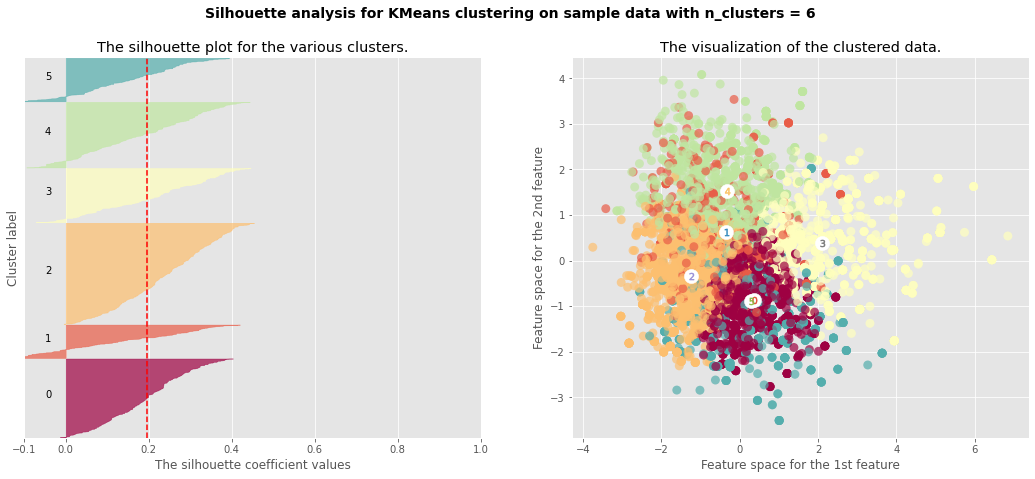

For n_clusters = 7 The average silhouette_score is : 0.1950891357488768


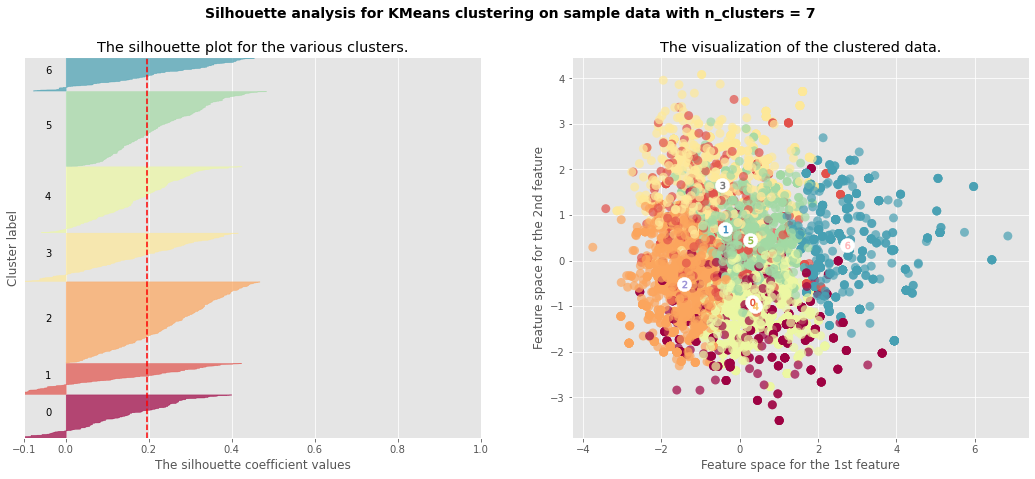

For n_clusters = 8 The average silhouette_score is : 0.20522963267643743


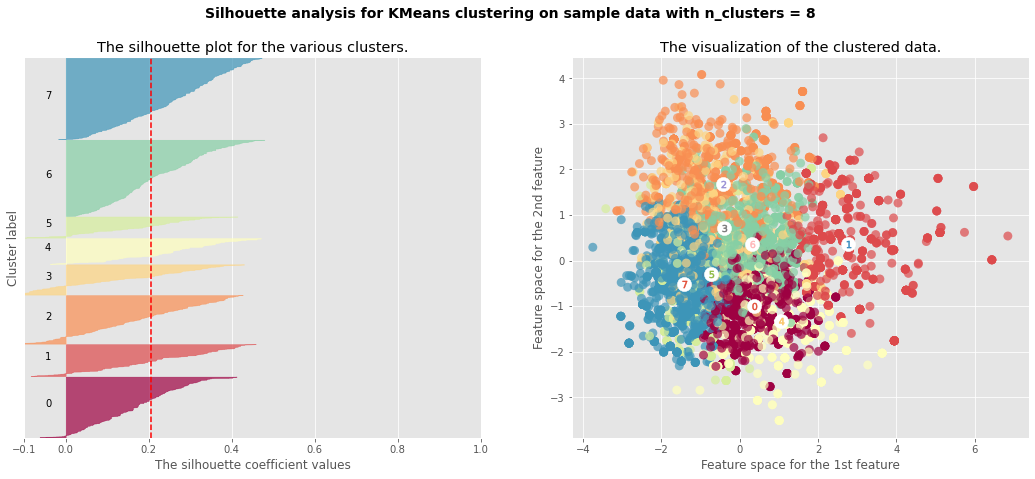

For n_clusters = 9 The average silhouette_score is : 0.2047514128844813


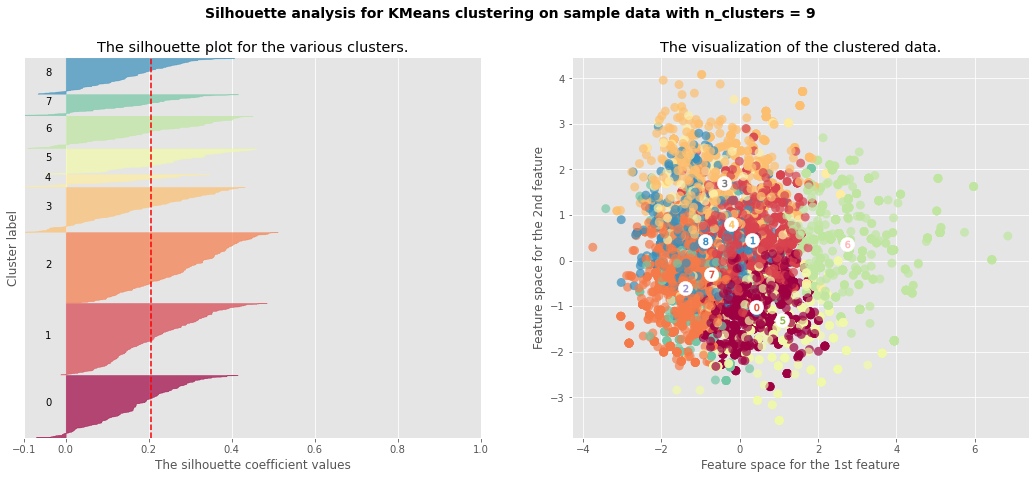

For n_clusters = 10 The average silhouette_score is : 0.1871421004044824


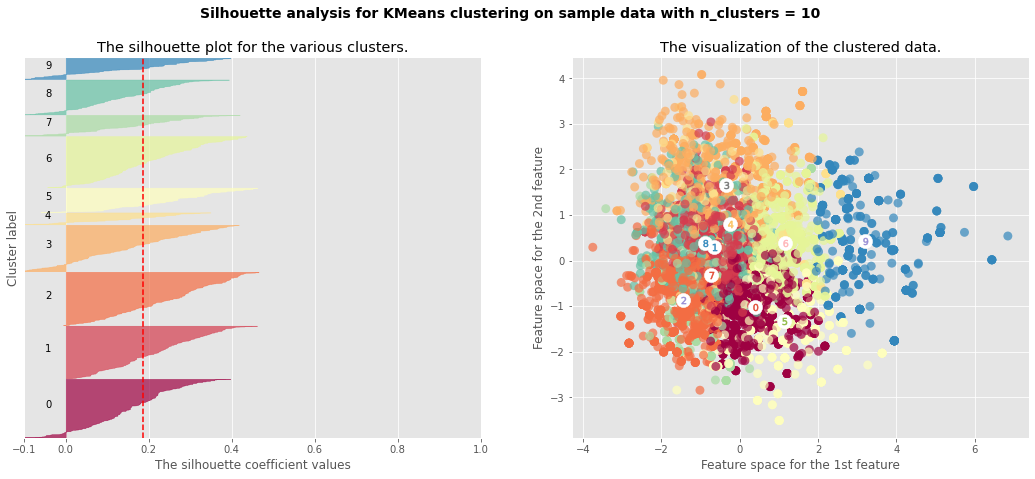

In [437]:

print(__doc__)

cmap = cm.get_cmap("Spectral")

X = pcadf.values
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cmap(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='o', s=80, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.21452045793626465


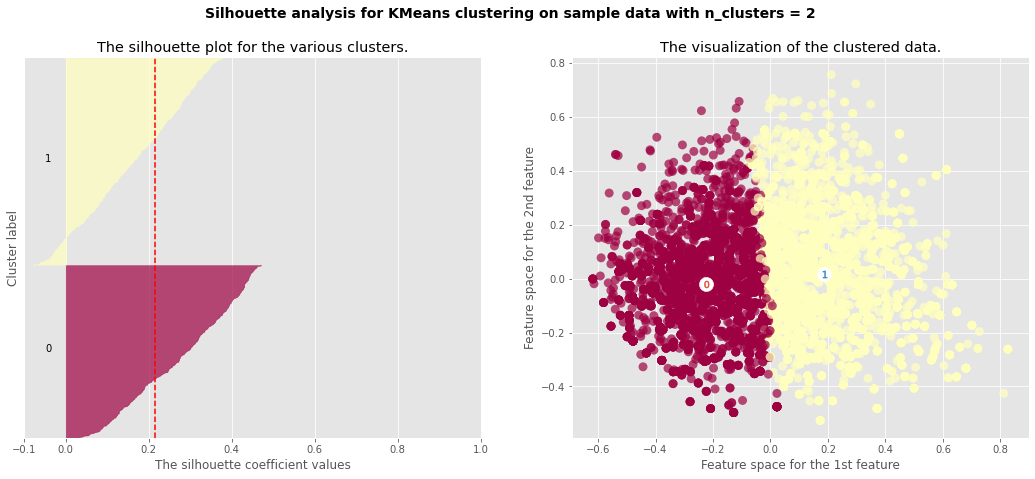

For n_clusters = 3 The average silhouette_score is : 0.20581259812839436


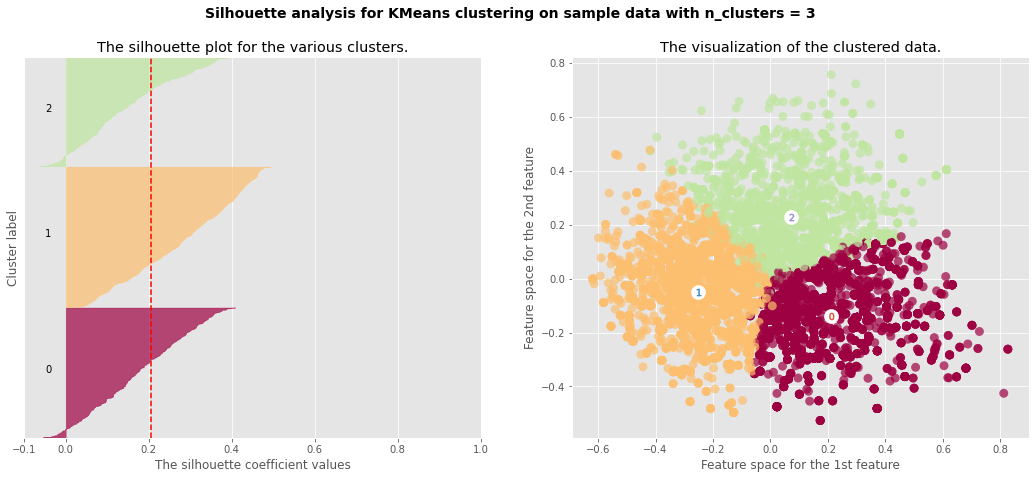

For n_clusters = 4 The average silhouette_score is : 0.21832358273398797


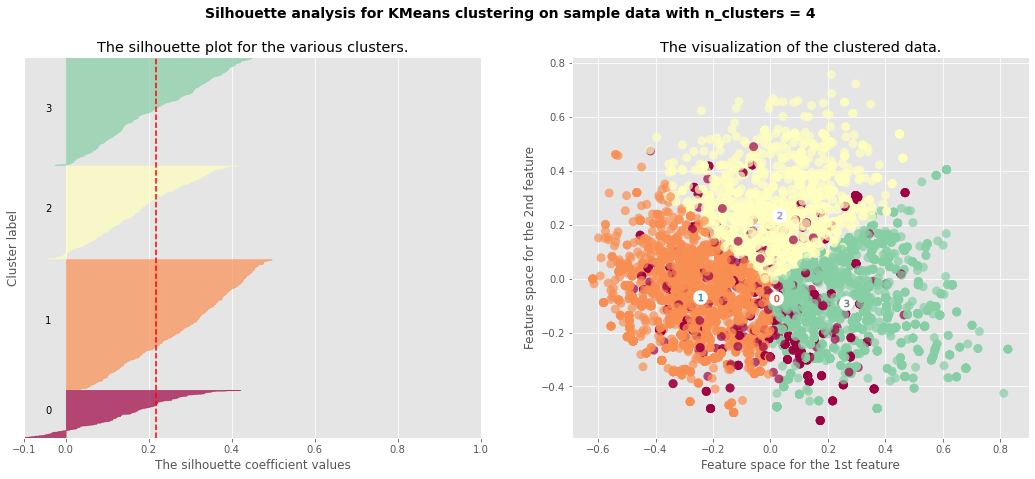

For n_clusters = 5 The average silhouette_score is : 0.19006295277529411


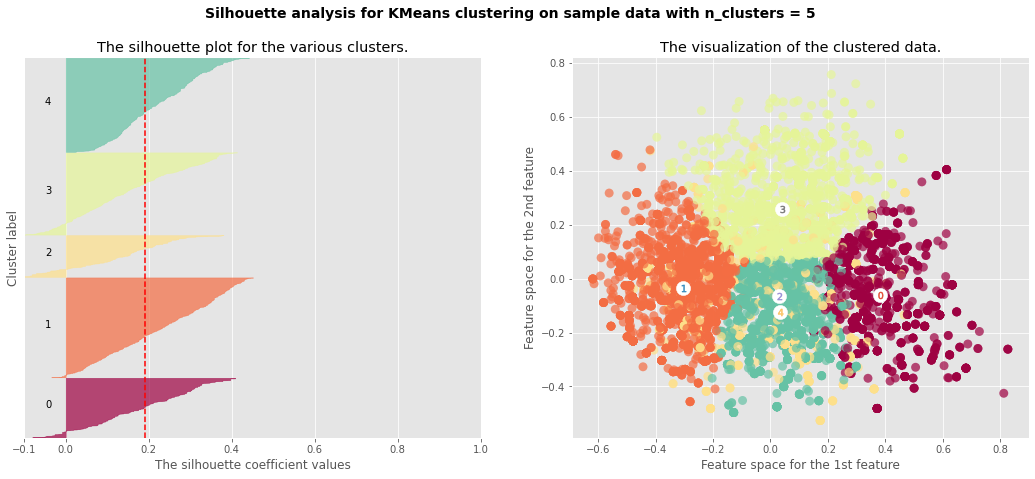

For n_clusters = 6 The average silhouette_score is : 0.1868374941733174


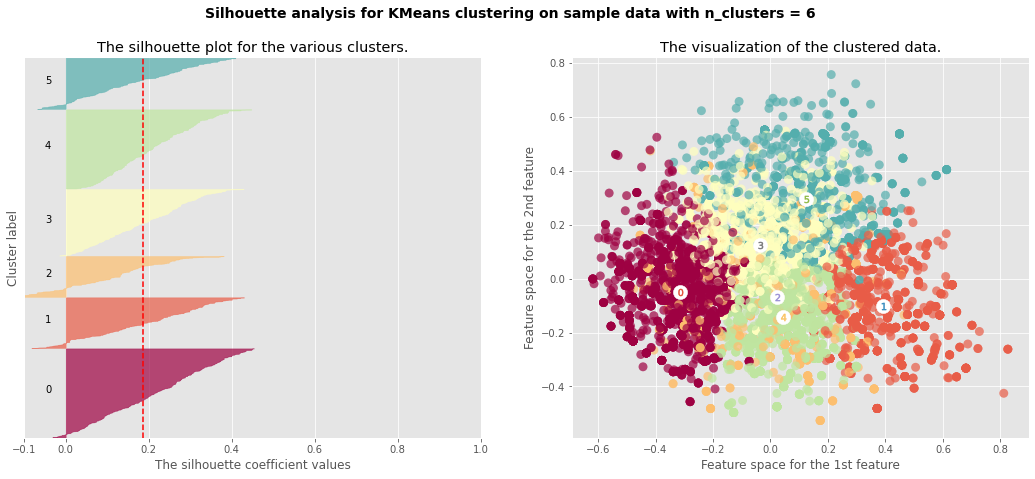

For n_clusters = 7 The average silhouette_score is : 0.1975416981154837


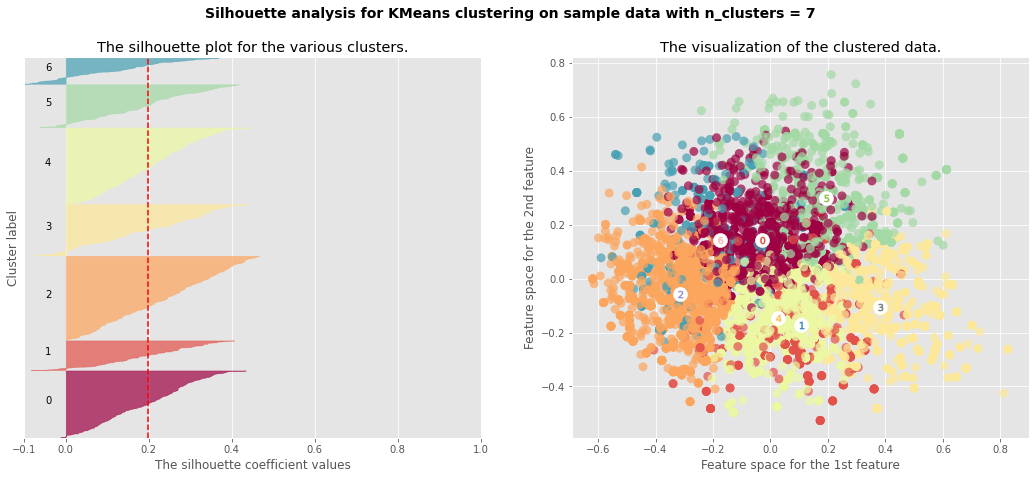

For n_clusters = 8 The average silhouette_score is : 0.19187960403672452


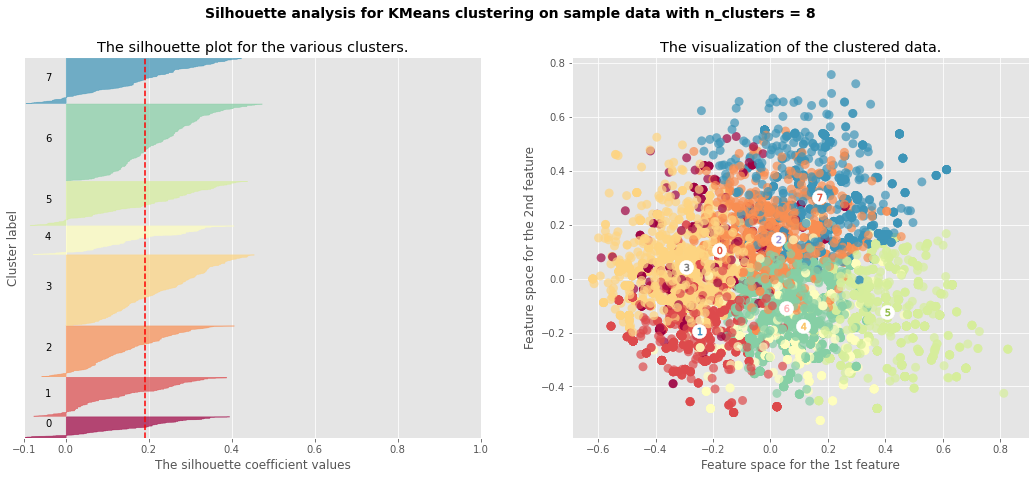

For n_clusters = 9 The average silhouette_score is : 0.19493021481752593


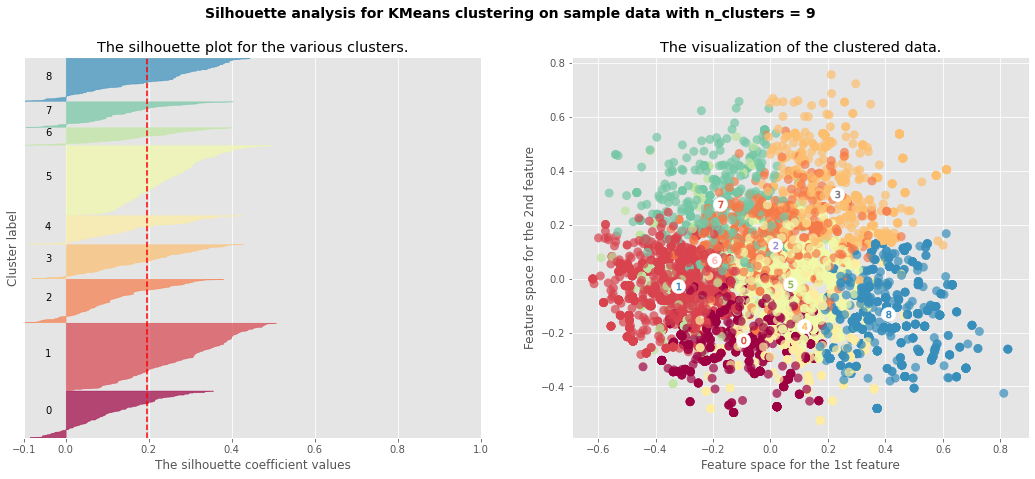

For n_clusters = 10 The average silhouette_score is : 0.18164309796592917


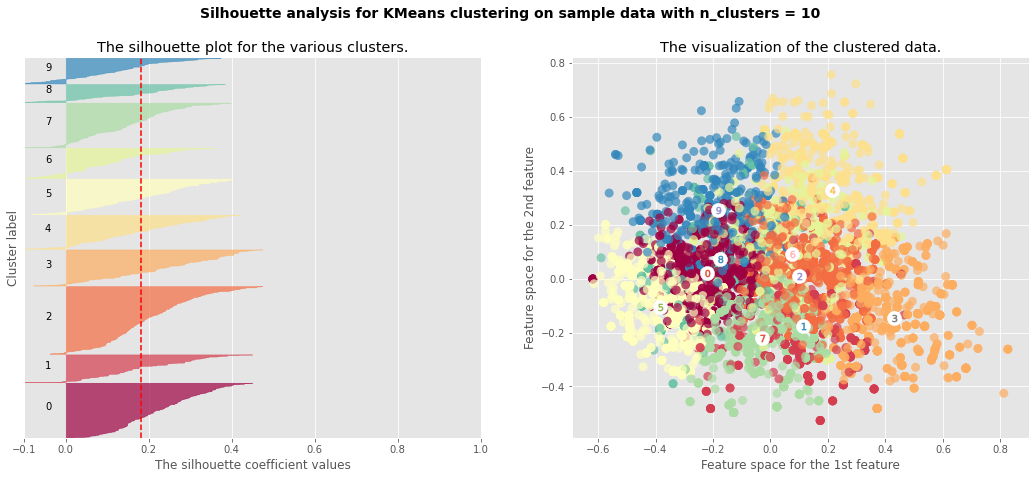

In [438]:

print(__doc__)

cmap = cm.get_cmap("Spectral")

X = pcadfmin.values
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cmap(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='o', s=80, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [439]:
#get a better silhoutte score from these

In [440]:
#seems difference between min max and standard scaler is minimal 

In [441]:
#we will also try the elbow method to see how many clusters!


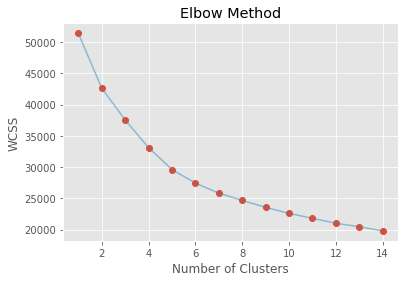

In [442]:
wcss = []
for i in range(1,15):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
  kmeans.fit(audio)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,15), wcss, 'o')
plt.plot(range(1 , 15) , wcss , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

In [443]:
#no distinct 'elbow'

In [444]:
#lets try with our pca data 

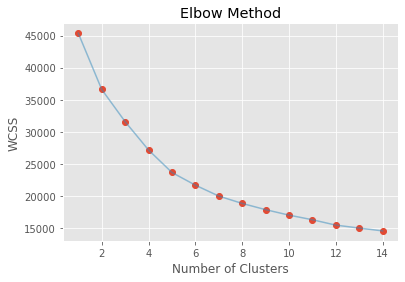

In [445]:
wcss = []
for i in range(1,15):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
  kmeans.fit(pcadf)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,15), wcss, 'o')
plt.plot(range(1 , 15) , wcss , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

In [446]:
#looks like 5 is the ideal number!
##validate agaist value count of 7 to see if thickness appropriated by that 
#silhoutte scoore is IGNORED- as clusters will overlap 

# We will use the last dataset, with 5 clusters

# Applying K-means to our dataset



In [447]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster, metrics
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 
from sklearn import datasets
from sklearn.cluster import KMeans


In [449]:
#lets say with 5 clusters 

In [452]:
pcadfmin

pC1       pC2       pC3       pC4       pC5
0    -0.478110 -0.231336 -0.095639 -0.010198 -0.041813
1    -0.010092  0.309031 -0.027524  0.005955  0.017049
2     0.440637 -0.105672  0.022920  0.053898 -0.034920
3    -0.037470  0.113667  0.504454 -0.191632  0.031769
4    -0.312180 -0.036349 -0.141164  0.053061 -0.012082
...        ...       ...       ...       ...       ...
7340 -0.058364 -0.175919 -0.019849 -0.305017  0.014007
7341 -0.304166  0.401652 -0.058044 -0.031666  0.132102
7342 -0.534370  0.062973 -0.150122 -0.050193  0.091025
7343 -0.355689  0.246503 -0.110749  0.116573  0.087544
7344 -0.457063  0.141333 -0.067590  0.112300  0.017436

[7345 rows x 5 columns]

In [453]:
scores_pcamin

array([[-0.47810973, -0.23133608, -0.09563909, -0.01019786, -0.04181251],
       [-0.01009212,  0.30903056, -0.02752397,  0.00595511,  0.0170495 ],
       [ 0.44063715, -0.10567197,  0.02291961,  0.05389755, -0.03491997],
       ...,
       [-0.53437046,  0.06297315, -0.1501222 , -0.0501935 ,  0.09102488],
       [-0.35568887,  0.24650284, -0.11074878,  0.11657322,  0.08754443],
       [-0.45706346,  0.14133322, -0.0675898 ,  0.11230017,  0.01743556]])

In [454]:
kmeanswpca = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

In [455]:
kmeanswpca

KMeans(n_clusters=5, random_state=42)

In [456]:
todfkpca=kmeanswpca.fit_transform(scores_pcamin)

In [457]:
dtale.show(todfkpca)

In [458]:
todfkpca

array([[0.27008451, 0.73932042, 0.7223668 , 0.51821462, 0.87663383],
       [0.45903289, 0.57239267, 0.06753326, 0.42553906, 0.54493049],
       [0.76257393, 0.55540764, 0.55207859, 0.42558463, 0.16678565],
       ...,
       [0.28299017, 0.80923175, 0.62851913, 0.61128182, 0.92929993],
       [0.34512821, 0.70412307, 0.42533955, 0.55013387, 0.81943234],
       [0.27981039, 0.70088094, 0.52384522, 0.55452455, 0.87658329]])

In [459]:
labels1 = kmeanswpca.labels_

In [460]:
c0 = todfkpca[labels1 == 0]
c1 = todfkpca[labels1 == 1]
c2 = todfkpca[labels1 == 2]
c3 = todfkpca[labels1 == 3]
c4 = todfkpca[labels1 == 4]

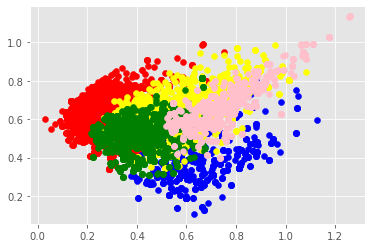

In [461]:
plt.scatter(c0[:,0], c0[:,1],color = "red")
plt.scatter(c1[:,0], c1[:,1],color = "blue")
plt.scatter(c2[:,0], c2[:,1],color = "yellow")
plt.scatter(c3[:,0], c3[:,1],color = "green")
plt.scatter(c4[:,0], c4[:,1],color = "pink")

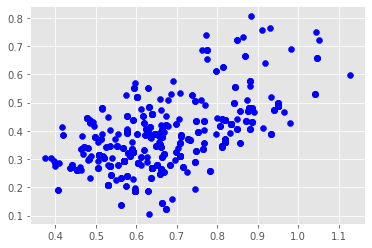

In [462]:
plt.scatter(c1[:,0], c1[:,1],color = "blue")

In [463]:
audiokmpcadf = pd.DataFrame(todfkpca, columns = ["C0","C1","C2","C3","C4"])

In [464]:
audiokmpcadf[:2]

C0        C1        C2        C3        C4
0  0.270085  0.739320  0.722367  0.518215  0.876634
1  0.459033  0.572393  0.067533  0.425539  0.544930

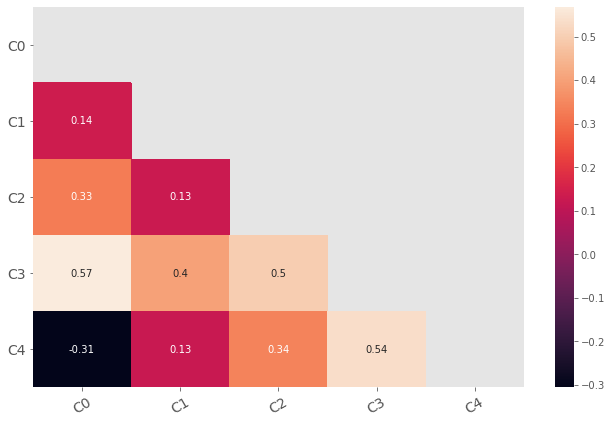

In [465]:
correlation_heat_map(audiokmpcadf)

In [466]:
df1 = pd.concat([audio, audiokmpcadf.set_index(audio.index)], axis = 1 )

In [467]:
df1

energy  loudness  speechiness   valence  liveness     tempo  \
0   0.017077  1.379055    -0.187752  2.016553 -0.613969 -0.858429   
1   1.088377  0.646413     0.016366 -0.100360 -0.249905  0.578495   
2  -1.166063 -0.878003    -0.424616 -1.871204  1.186168 -0.048626   
3  -0.324327 -0.292759     2.014975  0.194167 -0.296480  2.457835   
4   0.670452  0.994255    -0.492291  1.146778  0.060597 -0.637975   
..       ...       ...          ...       ...       ...       ...   
91 -1.454490 -0.408851    -0.678945  0.824639 -0.459494  0.577685   
92  1.824161  1.082520    -0.246695  1.050136  0.852378  1.020286   
93  1.518075  0.065518    -0.741162  2.103991  0.534113 -0.035078   
94  1.771184  1.529931    -0.462820  1.008719  1.551008  0.179779   
95  1.777070  1.442101     0.628720  1.689813 -1.129403 -0.619125   

    danceability        C0        C1        C2        C3        C4  
0       1.192844  0.270085  0.739320  0.722367  0.518215  0.876634  
1      -1.342555  0.459033  0.572393  0.067533  0.425539  0.544930  
2       0.565960  0.762574  0.555408  0.552079  0.425585  0.166786  
3       0.189829  0.646356  0.389322  0.598244  0.636387  0.751647  
4       0.461479  0.138690  0.637141  0.478659  0.359513  0.703193  
..           ...       ...       ...       ...       ...       ...  
91      0.259483  0.389369  0.603800  0.550475  0.341605  0.523454  
92     -1.252005  0.456351  0.746833  0.393424  0.634294  0.836783  
93      0.308241  0.282990  0.809232  0.628519  0.611282  0.929300  
94     -0.095751  0.345128  0.704123  0.425340  0.550134  0.819432  
95     -0.618155  0.279810  0.700881  0.523845  0.554525  0.876583  

[7345 rows x 12 columns]

In [468]:
df1["clusters"] = kmeanswpca.labels_

In [469]:
df1.duplicated().sum()

4952

In [470]:
#now we have the assigned cluster associated with the song

In [471]:
# audiokmpca = pd.concat([audio,scoreskmeansdf.set_index(audio.index)],axis = 1 )

In [472]:
df1.columns

Index(['energy', 'loudness', 'speechiness', 'valence', 'liveness', 'tempo',
       'danceability', 'C0', 'C1', 'C2', 'C3', 'C4', 'clusters'],
      dtype='object')

In [473]:
pcadf.columns

Index(['pC1', 'pC2', 'pC3', 'pC4', 'pC5'], dtype='object')

In [474]:
# x = pcadf['pC2']
# y = pcadf['pC1']
# fig = plt.figure(figsize=(10, 8))
# sns.scatterplot(x, y, hue=df2['clusters'],palette="deep")
# plt.title('Clusters Kmeans normal dist.', fontsize=20)
# plt.xlabel("pC2", fontsize=18)
# plt.ylabel("pC1", fontsize=18)
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
# plt.show()

In [475]:
from mpl_toolkits.mplot3d import Axes3D
# data preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [476]:
# instantiating model
kmeans = KMeans(n_clusters = 8, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(audio2)
scaled = pd.DataFrame(scaler.fit_transform(audio2))

In [477]:
audio2

energy  loudness  speechiness   valence  liveness     tempo  \
0   0.636809  0.856359     0.106625  0.950148  0.076271  0.265286   
1   0.830653  0.773100     0.140943  0.462240  0.125340  0.516417   
2   0.422729  0.599862     0.066801  0.054094  0.318895  0.406815   
3   0.575035  0.666370     0.476968  0.530123  0.119063  0.844869   
4   0.755032  0.812630     0.055423  0.749682  0.167190  0.303815   
..       ...       ...          ...       ...       ...       ...   
91  0.370540  0.653177     0.024041  0.675435  0.097091  0.516276   
92  0.963787  0.822660     0.096715  0.727408  0.273907  0.593629   
93  0.908403  0.707086     0.013580  0.970301  0.231011  0.409183   
94  0.954202  0.873505     0.060378  0.717862  0.368069  0.446734   
95  0.955267  0.863524     0.243898  0.874841  0.006801  0.307109   

    danceability  
0       0.834532  
1       0.398082  
2       0.726619  
3       0.661871  
4       0.708633  
..           ...  
91      0.673861  
92      0.413669  
93      0.682254  
94      0.612710  
95      0.522782  

[7345 rows x 7 columns]

In [478]:
y_kmeans

array([1, 6, 0, ..., 1, 1, 1], dtype=int32)

In [481]:
##KMEANWPCA INVESTIGATION

In [482]:
#lets try a radar chart to see how our components compare to the spotify labels


In [483]:
#For this i need to normalise my clusters 
#will drop my cluster column and re-add after vis.

In [484]:
components = ["C0","C1","C2","C3","C4"]

In [485]:
df1norm = df1.copy()

In [486]:
from sklearn.preprocessing import Normalizer

In [487]:
transformer = Normalizer().fit(df1norm)

In [488]:
df1norm = transformer.transform(df1norm)

In [489]:
df1norm

array([[ 0.00521582,  0.42121668, -0.05734664, ...,  0.15828277,
         0.26775784,  0.        ],
       [ 0.36620057,  0.21749532,  0.00550662, ...,  0.1431789 ,
         0.18334991,  0.67292952],
       [-0.23346637, -0.17579165, -0.08501556, ...,  0.08520953,
         0.03339342,  0.80087035],
       ...,
       [ 0.47925044,  0.02068368, -0.23398212, ...,  0.19297936,
         0.29337647,  0.        ],
       [ 0.53582415,  0.46283959, -0.14001366, ...,  0.16642821,
         0.24789722,  0.        ],
       [ 0.50365569,  0.40871904,  0.17819117, ...,  0.15716284,
         0.24844044,  0.        ]])

In [490]:
df1norm = pd.DataFrame(df1norm, columns = df1.columns)

In [491]:
df1norm = df1.drop(['clusters'], axis = 1 )

In [492]:
df1norm["clusters"] = kmeanswpca.labels_

In [493]:
df1norm

energy  loudness  speechiness   valence  liveness     tempo  \
0   0.017077  1.379055    -0.187752  2.016553 -0.613969 -0.858429   
1   1.088377  0.646413     0.016366 -0.100360 -0.249905  0.578495   
2  -1.166063 -0.878003    -0.424616 -1.871204  1.186168 -0.048626   
3  -0.324327 -0.292759     2.014975  0.194167 -0.296480  2.457835   
4   0.670452  0.994255    -0.492291  1.146778  0.060597 -0.637975   
..       ...       ...          ...       ...       ...       ...   
91 -1.454490 -0.408851    -0.678945  0.824639 -0.459494  0.577685   
92  1.824161  1.082520    -0.246695  1.050136  0.852378  1.020286   
93  1.518075  0.065518    -0.741162  2.103991  0.534113 -0.035078   
94  1.771184  1.529931    -0.462820  1.008719  1.551008  0.179779   
95  1.777070  1.442101     0.628720  1.689813 -1.129403 -0.619125   

    danceability        C0        C1        C2        C3        C4  clusters  
0       1.192844  0.270085  0.739320  0.722367  0.518215  0.876634         0  
1      -1.342555  0.459033  0.572393  0.067533  0.425539  0.544930         2  
2       0.565960  0.762574  0.555408  0.552079  0.425585  0.166786         4  
3       0.189829  0.646356  0.389322  0.598244  0.636387  0.751647         1  
4       0.461479  0.138690  0.637141  0.478659  0.359513  0.703193         0  
..           ...       ...       ...       ...       ...       ...       ...  
91      0.259483  0.389369  0.603800  0.550475  0.341605  0.523454         3  
92     -1.252005  0.456351  0.746833  0.393424  0.634294  0.836783         2  
93      0.308241  0.282990  0.809232  0.628519  0.611282  0.929300         0  
94     -0.095751  0.345128  0.704123  0.425340  0.550134  0.819432         0  
95     -0.618155  0.279810  0.700881  0.523845  0.554525  0.876583         0  

[7345 rows x 13 columns]

In [494]:
# df1["clusters"] = kmeanswpca.labels_

In [495]:
df1norm.loc[0]

energy  loudness  speechiness   valence  liveness     tempo  \
0  0.017077  1.379055    -0.187752  2.016553 -0.613969 -0.858429   
0 -1.319106 -2.004575     3.030106  0.318421 -0.560407  0.582950   
0  0.340821 -0.004051    -0.413700  1.151380 -0.226617  0.210263   
0 -0.141853 -0.184494    -0.077506 -0.321255 -0.579814  1.131138   
0 -0.347872  0.867728    -0.486834 -1.039165 -0.249905  0.021508   
0 -0.777570  0.232482    -0.712782  1.284838  2.296213 -0.856220   
0  0.652793  0.849901     1.753005  0.516306 -0.405156  0.762280   
0  0.511523 -0.130143    -0.675670  0.166555 -0.148992 -0.644712   
0  0.511523 -0.130143    -0.675670  0.166555 -0.148992 -0.644712   
0 -0.724593 -0.274063     2.135044  0.778619 -0.981914 -0.894692   
0 -1.542784 -0.991486    -0.767359 -1.103593 -0.482782 -0.344147   
0 -0.924726 -0.737562    -0.766268 -0.173992 -0.658992  0.710002   
0  1.506302  0.305094    -0.473735 -0.546753 -0.280955  1.255576   
0  1.847706  0.458144     0.486820 -1.296876 -0.443969  0.656066   
0 -1.319106 -0.898004    -0.681128 -0.624986 -0.397394 -0.173800   

   danceability        C0        C1        C2        C3        C4  clusters  
0      1.192844  0.270085  0.739320  0.722367  0.518215  0.876634         0  
0      0.329137  0.708538  0.310912  0.762410  0.615327  0.710937         1  
0      0.468444  0.070800  0.572802  0.446589  0.327375  0.656005         0  
0      1.757040  0.452254  0.422319  0.492288  0.331962  0.546070         3  
0     -0.792290  0.585247  0.569057  0.277946  0.318458  0.240288         4  
0      0.586856  0.348255  0.668135  0.617660  0.419586  0.673698         0  
0      0.071418  0.389627  0.305624  0.418793  0.447990  0.694813         1  
0     -1.147524  0.384665  0.628688  0.256576  0.291218  0.445273         2  
0     -1.147524  0.384665  0.628688  0.256576  0.291218  0.445273         2  
0      0.886367  0.463917  0.334817  0.678369  0.413138  0.678135         1  
0      0.760991  0.674149  0.608939  0.603927  0.347801  0.246287         4  
0     -0.952494  0.526333  0.609331  0.378147  0.346121  0.318575         4  
0     -0.778359  0.543439  0.627223  0.171189  0.496068  0.586836         2  
0     -2.004266  0.764087  0.693096  0.320589  0.648822  0.627720         2  
0     -2.094816  0.702015  0.718334  0.473867  0.466834  0.238107         4

In [496]:
df1norm.iloc[:,0:7]

energy  loudness  speechiness   valence  liveness     tempo  \
0   0.017077  1.379055    -0.187752  2.016553 -0.613969 -0.858429   
1   1.088377  0.646413     0.016366 -0.100360 -0.249905  0.578495   
2  -1.166063 -0.878003    -0.424616 -1.871204  1.186168 -0.048626   
3  -0.324327 -0.292759     2.014975  0.194167 -0.296480  2.457835   
4   0.670452  0.994255    -0.492291  1.146778  0.060597 -0.637975   
..       ...       ...          ...       ...       ...       ...   
91 -1.454490 -0.408851    -0.678945  0.824639 -0.459494  0.577685   
92  1.824161  1.082520    -0.246695  1.050136  0.852378  1.020286   
93  1.518075  0.065518    -0.741162  2.103991  0.534113 -0.035078   
94  1.771184  1.529931    -0.462820  1.008719  1.551008  0.179779   
95  1.777070  1.442101     0.628720  1.689813 -1.129403 -0.619125   

    danceability  
0       1.192844  
1      -1.342555  
2       0.565960  
3       0.189829  
4       0.461479  
..           ...  
91      0.259483  
92     -1.252005  
93      0.308241  
94     -0.095751  
95     -0.618155  

[7345 rows x 7 columns]

In [497]:
df1norm.iloc[:,7:17]

C0        C1        C2        C3        C4  clusters
0   0.270085  0.739320  0.722367  0.518215  0.876634         0
1   0.459033  0.572393  0.067533  0.425539  0.544930         2
2   0.762574  0.555408  0.552079  0.425585  0.166786         4
3   0.646356  0.389322  0.598244  0.636387  0.751647         1
4   0.138690  0.637141  0.478659  0.359513  0.703193         0
..       ...       ...       ...       ...       ...       ...
91  0.389369  0.603800  0.550475  0.341605  0.523454         3
92  0.456351  0.746833  0.393424  0.634294  0.836783         2
93  0.282990  0.809232  0.628519  0.611282  0.929300         0
94  0.345128  0.704123  0.425340  0.550134  0.819432         0
95  0.279810  0.700881  0.523845  0.554525  0.876583         0

[7345 rows x 6 columns]

In [498]:
theta = df1norm.iloc[:,0:7]

In [499]:
# values.loc[:,0:7

In [500]:
values = df1norm.iloc[:,7:14]

In [501]:
import plotly.graph_objects as go


In [502]:
df1norm

energy  loudness  speechiness   valence  liveness     tempo  \
0   0.017077  1.379055    -0.187752  2.016553 -0.613969 -0.858429   
1   1.088377  0.646413     0.016366 -0.100360 -0.249905  0.578495   
2  -1.166063 -0.878003    -0.424616 -1.871204  1.186168 -0.048626   
3  -0.324327 -0.292759     2.014975  0.194167 -0.296480  2.457835   
4   0.670452  0.994255    -0.492291  1.146778  0.060597 -0.637975   
..       ...       ...          ...       ...       ...       ...   
91 -1.454490 -0.408851    -0.678945  0.824639 -0.459494  0.577685   
92  1.824161  1.082520    -0.246695  1.050136  0.852378  1.020286   
93  1.518075  0.065518    -0.741162  2.103991  0.534113 -0.035078   
94  1.771184  1.529931    -0.462820  1.008719  1.551008  0.179779   
95  1.777070  1.442101     0.628720  1.689813 -1.129403 -0.619125   

    danceability        C0        C1        C2        C3        C4  clusters  
0       1.192844  0.270085  0.739320  0.722367  0.518215  0.876634         0  
1      -1.342555  0.459033  0.572393  0.067533  0.425539  0.544930         2  
2       0.565960  0.762574  0.555408  0.552079  0.425585  0.166786         4  
3       0.189829  0.646356  0.389322  0.598244  0.636387  0.751647         1  
4       0.461479  0.138690  0.637141  0.478659  0.359513  0.703193         0  
..           ...       ...       ...       ...       ...       ...       ...  
91      0.259483  0.389369  0.603800  0.550475  0.341605  0.523454         3  
92     -1.252005  0.456351  0.746833  0.393424  0.634294  0.836783         2  
93      0.308241  0.282990  0.809232  0.628519  0.611282  0.929300         0  
94     -0.095751  0.345128  0.704123  0.425340  0.550134  0.819432         0  
95     -0.618155  0.279810  0.700881  0.523845  0.554525  0.876583         0  

[7345 rows x 13 columns]

In [610]:
categories = list(df1norm[["energy", "loudness", "speechiness", "valence","liveness","tempo","danceability"]])
# categories = [*categories, categories[0]]
# categories = [*categories, categories[0]]
C0 = values.C0.iloc[0:6]
C1 = values.C1.iloc[0:6]
C2 = values.C2.iloc[0:6]
C3 = values.C3.iloc[0:6]
C4= values.C4.iloc[0:6]

fig = go.Figure(
    data=[
        go.Scatterpolar(r=C0, theta=categories,fill='toself', name='C0'),
        go.Scatterpolar(r=C1, theta=categories,fill='toself', name='C1'),
        go.Scatterpolar(r=C2, theta=categories,fill='toself', name='C2'),
        go.Scatterpolar(r=C3, theta=categories,fill='toself', name='C3'),
        go.Scatterpolar(r=C4, theta=categories,fill='toself', name='C4'),


       
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Clusters vs Spotify labels'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

pyo.plot(fig)

'temp-plot.html'

In [504]:
songinfo = sdraft.drop(["energy", "loudness", "speechiness", "valence","liveness","tempo","danceability"],axis=1)

In [505]:
df1

energy  loudness  speechiness   valence  liveness     tempo  \
0   0.017077  1.379055    -0.187752  2.016553 -0.613969 -0.858429   
1   1.088377  0.646413     0.016366 -0.100360 -0.249905  0.578495   
2  -1.166063 -0.878003    -0.424616 -1.871204  1.186168 -0.048626   
3  -0.324327 -0.292759     2.014975  0.194167 -0.296480  2.457835   
4   0.670452  0.994255    -0.492291  1.146778  0.060597 -0.637975   
..       ...       ...          ...       ...       ...       ...   
91 -1.454490 -0.408851    -0.678945  0.824639 -0.459494  0.577685   
92  1.824161  1.082520    -0.246695  1.050136  0.852378  1.020286   
93  1.518075  0.065518    -0.741162  2.103991  0.534113 -0.035078   
94  1.771184  1.529931    -0.462820  1.008719  1.551008  0.179779   
95  1.777070  1.442101     0.628720  1.689813 -1.129403 -0.619125   

    danceability        C0        C1        C2        C3        C4  clusters  
0       1.192844  0.270085  0.739320  0.722367  0.518215  0.876634         0  
1      -1.342555  0.459033  0.572393  0.067533  0.425539  0.544930         2  
2       0.565960  0.762574  0.555408  0.552079  0.425585  0.166786         4  
3       0.189829  0.646356  0.389322  0.598244  0.636387  0.751647         1  
4       0.461479  0.138690  0.637141  0.478659  0.359513  0.703193         0  
..           ...       ...       ...       ...       ...       ...       ...  
91      0.259483  0.389369  0.603800  0.550475  0.341605  0.523454         3  
92     -1.252005  0.456351  0.746833  0.393424  0.634294  0.836783         2  
93      0.308241  0.282990  0.809232  0.628519  0.611282  0.929300         0  
94     -0.095751  0.345128  0.704123  0.425340  0.550134  0.819432         0  
95     -0.618155  0.279810  0.700881  0.523845  0.554525  0.876583         0  

[7345 rows x 13 columns]

In [506]:
dfmodel1 = pd.concat([songinfo,df1], axis = 1 )

In [507]:
dfmodel1

artist                  songid  \
0               Ed Sheeran  7qiZfU4dY1lWllzX7mPBI3   
1               Ed Sheeran  6PCUP3dWmTjcTtXY02oFdT   
2       ZAYN, Taylor Swift  3NdDpSvN911VPGivFlV5d0   
3    The Weeknd, Daft Punk  5aAx2yezTd8zXrkmtKl66Z   
4             Clean Bandit  5knuzwU65gJK7IF5yJsuaW   
..                     ...                     ...   
91              Red Riders  1vI75BTbqaOR9yd9413Fcy   
92               Pearl Jam  4mWYx9wadNBVrgcTRzHSkB   
93                  Gossip  7anI9BA3qzGFhVBaogZ7xd   
94              Audioslave  7kKf7Lr1xufPFlgwjIDFVz   
95         Blue King Brown  0nnrBiyc3fF3PS1m0K4Gq1   

                                                title  year    energy  \
0                                        Shape of You     0  0.017077   
1                                  Castle on the Hill     0  1.088377   
2   I Don’t Wanna Live Forever (Fifty Shades Darke...     0 -1.166063   
3                                             Starboy     0 -0.324327   
4             Rockabye (feat. Sean Paul & Anne-Marie)     0  0.670452   
..                                                ...   ...       ...   
91                                Slide In Next To Me  2006 -1.454490   
92                                 World Wide Suicide  2006  1.824161   
93                     Standing in the Way of Control  2006  1.518075   
94                                      Original Fire  2006  1.771184   
95                           Come and Check your Head  2006  1.777070   

    loudness  speechiness   valence  liveness     tempo  danceability  \
0   1.379055    -0.187752  2.016553 -0.613969 -0.858429      1.192844   
1   0.646413     0.016366 -0.100360 -0.249905  0.578495     -1.342555   
2  -0.878003    -0.424616 -1.871204  1.186168 -0.048626      0.565960   
3  -0.292759     2.014975  0.194167 -0.296480  2.457835      0.189829   
4   0.994255    -0.492291  1.146778  0.060597 -0.637975      0.461479   
..       ...          ...       ...       ...       ...           ...   
91 -0.408851    -0.678945  0.824639 -0.459494  0.577685      0.259483   
92  1.082520    -0.246695  1.050136  0.852378  1.020286     -1.252005   
93  0.065518    -0.741162  2.103991  0.534113 -0.035078      0.308241   
94  1.529931    -0.462820  1.008719  1.551008  0.179779     -0.095751   
95  1.442101     0.628720  1.689813 -1.129403 -0.619125     -0.618155   

          C0        C1        C2        C3        C4  clusters  
0   0.270085  0.739320  0.722367  0.518215  0.876634         0  
1   0.459033  0.572393  0.067533  0.425539  0.544930         2  
2   0.762574  0.555408  0.552079  0.425585  0.166786         4  
3   0.646356  0.389322  0.598244  0.636387  0.751647         1  
4   0.138690  0.637141  0.478659  0.359513  0.703193         0  
..       ...       ...       ...       ...       ...       ...  
91  0.389369  0.603800  0.550475  0.341605  0.523454         3  
92  0.456351  0.746833  0.393424  0.634294  0.836783         2  
93  0.282990  0.809232  0.628519  0.611282  0.929300         0  
94  0.345128  0.704123  0.425340  0.550134  0.819432         0  
95  0.279810  0.700881  0.523845  0.554525  0.876583         0  

[7345 rows x 17 columns]

# MODEL 2 - KMEANS - W/ GMM 

In [508]:
from sklearn.mixture import GaussianMixture


In [509]:
# data preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [510]:
kmeansgm = GaussianMixture(n_components=5, 
                            max_iter=1000, 
                            tol=1e-4,
                            init_params='kmeans')

In [511]:
scores_pca

array([[-1.593303  , -2.00851535, -0.96979212, -0.37842389,  0.03425925],
       [-1.00885781,  1.43172834,  0.22515467, -0.51332478, -0.24355058],
       [ 1.89561692,  0.46556453, -0.01213055,  1.15622097, -0.02716494],
       ...,
       [-1.95201321, -0.64207555, -0.72183735,  0.33935339,  1.33024074],
       [-2.65252691,  0.56448171, -0.42065649,  1.20939428,  0.40176027],
       [-2.45660732, -0.42238639, -0.27681933, -0.87079389, -0.80683789]])

In [512]:
dtale.show(scores_pcamin)

In [513]:
# kmeans.fit_transform(scores_pca)

In [514]:
kmeansgm.fit(scores_pcamin)

GaussianMixture(max_iter=1000, n_components=5, tol=0.0001)

In [515]:
todfgmpca = kmeansgm.predict_proba(scores_pcamin)

In [516]:
dtale.show(todfgmpca)

In [517]:
dtale.show(todfgmpca)

In [518]:
audiogmdf = pd.DataFrame(todfgmpca, columns = ["C0","C1","C2","C3","C4"])

In [519]:
#lets see if our correlation heat map is more or less the same

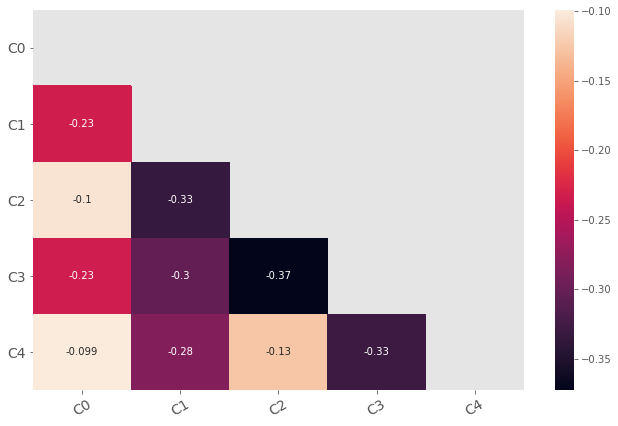

In [520]:
correlation_heat_map(audiogmdf)

In [521]:
#interesting ! very different results to our prevrious one 

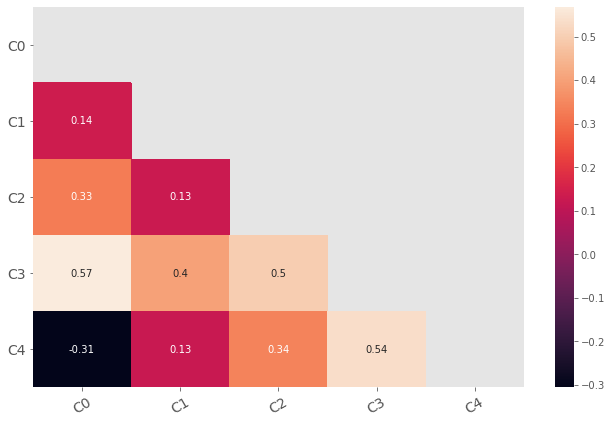

In [522]:
#previous corr heat map = 
correlation_heat_map(audiokmpcadf)

In [523]:
#the output of my GMM model is producing components that are far less correlated then by traditional models! 

In [603]:
labels2 = kmeansgm.predict(scores_pcamin)

In [604]:
labels2 

array([3, 0, 2, ..., 3, 3, 3])

In [599]:
kmeansgm.predict_proba

<bound method BaseMixture.predict_proba of GaussianMixture(max_iter=1000, n_components=5, tol=0.0001)>

In [595]:
kmeanswpca.labels_

array([0, 2, 4, ..., 0, 0, 0], dtype=int32)

In [525]:
todfgmpca

array([[1.43958600e-03, 1.73700095e-03, 1.24454096e-03, 9.95182893e-01,
        3.95979270e-04],
       [7.75681737e-01, 2.79911870e-03, 2.36197458e-03, 1.88675558e-01,
        3.04816117e-02],
       [2.30705440e-02, 7.28442630e-06, 7.17684973e-01, 2.54857145e-01,
        4.38005430e-03],
       ...,
       [8.44066558e-03, 5.27951017e-04, 3.18869592e-03, 9.86638796e-01,
        1.20389197e-03],
       [3.65063161e-01, 2.69319374e-07, 1.00809623e-01, 5.29486402e-01,
        4.64054416e-03],
       [4.77577254e-02, 5.12656464e-07, 6.03096837e-02, 8.87393900e-01,
        4.53817773e-03]])

In [605]:
c0 = todfgmpca[labels2 == 0]
c1 = todfgmpca[labels2 == 1]
c2 = todfgmpca[labels2 == 2]
c3 = todfgmpca[labels2 == 3]
c4 = todfgmpca[labels2 == 4]


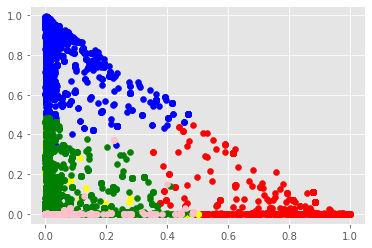

In [606]:
plt.scatter(c0[:,0], c0[:,1],color = "red")
plt.scatter(c1[:,0], c1[:,1],color = "blue")
plt.scatter(c2[:,0], c2[:,1],color = "yellow")
plt.scatter(c3[:,0], c3[:,1],color = "green")
plt.scatter(c4[:,0], c4[:,1],color = "pink")

In [527]:
audiogmdf

C0            C1        C2            C3        C4
0     1.439586e-03  1.737001e-03  0.001245  9.951829e-01  0.000396
1     7.756817e-01  2.799119e-03  0.002362  1.886756e-01  0.030482
2     2.307054e-02  7.284426e-06  0.717685  2.548571e-01  0.004380
3     1.473614e-12  6.073511e-53  0.000005  8.114724e-15  0.999995
4     3.059640e-03  1.182920e-02  0.006378  9.785928e-01  0.000140
...            ...           ...       ...           ...       ...
7340  5.222067e-01  2.905478e-01  0.008956  1.508624e-01  0.027427
7341  9.454798e-01  1.457939e-06  0.000884  1.115850e-02  0.042476
7342  8.440666e-03  5.279510e-04  0.003189  9.866388e-01  0.001204
7343  3.650632e-01  2.693194e-07  0.100810  5.294864e-01  0.004641
7344  4.775773e-02  5.126565e-07  0.060310  8.873939e-01  0.004538

[7345 rows x 5 columns]

In [528]:
transformer2 = Normalizer().fit(audiogmdf)

In [529]:
df2norm = transformer2.transform(audiogmdf)

In [530]:
df2norm

array([[1.44654924e-03, 1.74540279e-03, 1.25056077e-03, 9.99996569e-01,
        3.97894613e-04],
       [9.70950935e-01, 3.50376552e-03, 2.95657525e-03, 2.36172519e-01,
        3.81550164e-02],
       [3.02780952e-02, 9.56017999e-06, 9.41899504e-01, 3.34477977e-01,
        5.74844274e-03],
       ...,
       [8.55460498e-03, 5.35077756e-04, 3.23173969e-03, 9.99957299e-01,
        1.22014314e-03],
       [5.60766238e-01, 4.13696117e-07, 1.54851651e-01, 8.13333499e-01,
        7.12824730e-03],
       [5.36161633e-02, 5.75544008e-07, 6.77078697e-02, 9.96250467e-01,
        5.09487578e-03]])

In [531]:
# df2norm = pd.DataFrame(df2norm, columns = audiogmdf.columns)

# df2norm

In [532]:
kmeansgm.predict_proba

<bound method BaseMixture.predict_proba of GaussianMixture(max_iter=1000, n_components=5, tol=0.0001)>

In [533]:
gpredproba = kmeansgm.predict_proba(scores_pcamin)

In [534]:
columnsgm = ["C0%","C1%","C2%","C3%","C4%"]

In [535]:
gpredprobadf = pd.DataFrame(gpredproba, columns = columnsgm)

gpredprobadf = gpredprobadf.round(decimals = 3)

gpredprobadf

C0%    C1%    C2%    C3%    C4%
0     0.001  0.002  0.001  0.995  0.000
1     0.776  0.003  0.002  0.189  0.030
2     0.023  0.000  0.718  0.255  0.004
3     0.000  0.000  0.000  0.000  1.000
4     0.003  0.012  0.006  0.979  0.000
...     ...    ...    ...    ...    ...
7340  0.522  0.291  0.009  0.151  0.027
7341  0.945  0.000  0.001  0.011  0.042
7342  0.008  0.001  0.003  0.987  0.001
7343  0.365  0.000  0.101  0.529  0.005
7344  0.048  0.000  0.060  0.887  0.005

[7345 rows x 5 columns]

In [536]:
dtale.show(gpredproba)

In [537]:
df2 = pd.concat([audio, gpredprobadf.set_index(audio.index)], axis = 1)

In [538]:
df2

energy  loudness  speechiness   valence  liveness     tempo  \
0   0.017077  1.379055    -0.187752  2.016553 -0.613969 -0.858429   
1   1.088377  0.646413     0.016366 -0.100360 -0.249905  0.578495   
2  -1.166063 -0.878003    -0.424616 -1.871204  1.186168 -0.048626   
3  -0.324327 -0.292759     2.014975  0.194167 -0.296480  2.457835   
4   0.670452  0.994255    -0.492291  1.146778  0.060597 -0.637975   
..       ...       ...          ...       ...       ...       ...   
91 -1.454490 -0.408851    -0.678945  0.824639 -0.459494  0.577685   
92  1.824161  1.082520    -0.246695  1.050136  0.852378  1.020286   
93  1.518075  0.065518    -0.741162  2.103991  0.534113 -0.035078   
94  1.771184  1.529931    -0.462820  1.008719  1.551008  0.179779   
95  1.777070  1.442101     0.628720  1.689813 -1.129403 -0.619125   

    danceability    C0%    C1%    C2%    C3%    C4%  
0       1.192844  0.001  0.002  0.001  0.995  0.000  
1      -1.342555  0.776  0.003  0.002  0.189  0.030  
2       0.565960  0.023  0.000  0.718  0.255  0.004  
3       0.189829  0.000  0.000  0.000  0.000  1.000  
4       0.461479  0.003  0.012  0.006  0.979  0.000  
..           ...    ...    ...    ...    ...    ...  
91      0.259483  0.522  0.291  0.009  0.151  0.027  
92     -1.252005  0.945  0.000  0.001  0.011  0.042  
93      0.308241  0.008  0.001  0.003  0.987  0.001  
94     -0.095751  0.365  0.000  0.101  0.529  0.005  
95     -0.618155  0.048  0.000  0.060  0.887  0.005  

[7345 rows x 12 columns]

In [539]:
labels = kmeansgm.predict(scores_pcamin)

labels

array([3, 0, 2, ..., 3, 3, 3])

In [540]:
df2["highest_%_clusters"] = labels

In [541]:
df2

energy  loudness  speechiness   valence  liveness     tempo  \
0   0.017077  1.379055    -0.187752  2.016553 -0.613969 -0.858429   
1   1.088377  0.646413     0.016366 -0.100360 -0.249905  0.578495   
2  -1.166063 -0.878003    -0.424616 -1.871204  1.186168 -0.048626   
3  -0.324327 -0.292759     2.014975  0.194167 -0.296480  2.457835   
4   0.670452  0.994255    -0.492291  1.146778  0.060597 -0.637975   
..       ...       ...          ...       ...       ...       ...   
91 -1.454490 -0.408851    -0.678945  0.824639 -0.459494  0.577685   
92  1.824161  1.082520    -0.246695  1.050136  0.852378  1.020286   
93  1.518075  0.065518    -0.741162  2.103991  0.534113 -0.035078   
94  1.771184  1.529931    -0.462820  1.008719  1.551008  0.179779   
95  1.777070  1.442101     0.628720  1.689813 -1.129403 -0.619125   

    danceability    C0%    C1%    C2%    C3%    C4%  highest_%_clusters  
0       1.192844  0.001  0.002  0.001  0.995  0.000                   3  
1      -1.342555  0.776  0.003  0.002  0.189  0.030                   0  
2       0.565960  0.023  0.000  0.718  0.255  0.004                   2  
3       0.189829  0.000  0.000  0.000  0.000  1.000                   4  
4       0.461479  0.003  0.012  0.006  0.979  0.000                   3  
..           ...    ...    ...    ...    ...    ...                 ...  
91      0.259483  0.522  0.291  0.009  0.151  0.027                   0  
92     -1.252005  0.945  0.000  0.001  0.011  0.042                   0  
93      0.308241  0.008  0.001  0.003  0.987  0.001                   3  
94     -0.095751  0.365  0.000  0.101  0.529  0.005                   3  
95     -0.618155  0.048  0.000  0.060  0.887  0.005                   3  

[7345 rows x 13 columns]

In [542]:
# x = pcadfmin['pC1']
# y = pcadfmin['pC2']
# fig = plt.figure(figsize=(12, 10))
# sns.scatterplot(x, y, hue=df2['highest_%_clusters'],palette="deep")
# plt.title('Clusters Kmeans normal dist.', fontsize=20)
# plt.xlabel("pC1", fontsize=18)
# plt.ylabel("pC2", fontsize=18)
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
# plt.show()

In [543]:
dfgm = pd.DataFrame(data =pcadfmin)

In [544]:
type(pcadfmin)

pandas.core.frame.DataFrame

In [545]:
valuesgm = df2.iloc[:,7:14]

In [546]:
thetagm= df2.iloc[:,0:7]

In [547]:
valuesgm

C0%    C1%    C2%    C3%    C4%  highest_%_clusters
0   0.001  0.002  0.001  0.995  0.000                   3
1   0.776  0.003  0.002  0.189  0.030                   0
2   0.023  0.000  0.718  0.255  0.004                   2
3   0.000  0.000  0.000  0.000  1.000                   4
4   0.003  0.012  0.006  0.979  0.000                   3
..    ...    ...    ...    ...    ...                 ...
91  0.522  0.291  0.009  0.151  0.027                   0
92  0.945  0.000  0.001  0.011  0.042                   0
93  0.008  0.001  0.003  0.987  0.001                   3
94  0.365  0.000  0.101  0.529  0.005                   3
95  0.048  0.000  0.060  0.887  0.005                   3

[7345 rows x 6 columns]

In [609]:
categories = list(df2[["energy", "loudness", "speechiness", "valence","liveness","tempo","danceability"]])
# categories = [*categories, categories[0]]
# categories = [*categories, categories[0]]
C0 = valuesgm["C0%"].iloc[0:100]
C1 = valuesgm["C1%"].iloc[0:100]
C2 = valuesgm["C2%"].iloc[0:100]
C3 = valuesgm["C3%"].iloc[0:100]
C4= valuesgm["C4%"].iloc[0:100]


fig = go.Figure(
    data=[
        go.Scatterpolar(r=C0, theta=categories,fill='toself', name='C0%'),
        go.Scatterpolar(r=C1, theta=categories,fill='toself', name='C1%'),
        go.Scatterpolar(r=C2, theta=categories,fill='toself', name='C2%'),
        go.Scatterpolar(r=C3, theta=categories,fill='toself', name='C3%'),
        go.Scatterpolar(r=C4, theta=categories,fill='toself', name='C4%'),
   

       
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Clusters w/ gm vs Spotify labels'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

pyo.plot(fig)

'temp-plot.html'

Executing shutdown due to inactivity...


2021-07-14 20:41:08,935 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2021-07-14 20:41:09,161 - INFO     - Executing shutdown...


In [549]:
dfmodel2 = pd.concat([songinfo, df2], axis = 1)

In [550]:
dfmodel2

artist                  songid  \
0               Ed Sheeran  7qiZfU4dY1lWllzX7mPBI3   
1               Ed Sheeran  6PCUP3dWmTjcTtXY02oFdT   
2       ZAYN, Taylor Swift  3NdDpSvN911VPGivFlV5d0   
3    The Weeknd, Daft Punk  5aAx2yezTd8zXrkmtKl66Z   
4             Clean Bandit  5knuzwU65gJK7IF5yJsuaW   
..                     ...                     ...   
91              Red Riders  1vI75BTbqaOR9yd9413Fcy   
92               Pearl Jam  4mWYx9wadNBVrgcTRzHSkB   
93                  Gossip  7anI9BA3qzGFhVBaogZ7xd   
94              Audioslave  7kKf7Lr1xufPFlgwjIDFVz   
95         Blue King Brown  0nnrBiyc3fF3PS1m0K4Gq1   

                                                title  year    energy  \
0                                        Shape of You     0  0.017077   
1                                  Castle on the Hill     0  1.088377   
2   I Don’t Wanna Live Forever (Fifty Shades Darke...     0 -1.166063   
3                                             Starboy     0 -0.324327   
4             Rockabye (feat. Sean Paul & Anne-Marie)     0  0.670452   
..                                                ...   ...       ...   
91                                Slide In Next To Me  2006 -1.454490   
92                                 World Wide Suicide  2006  1.824161   
93                     Standing in the Way of Control  2006  1.518075   
94                                      Original Fire  2006  1.771184   
95                           Come and Check your Head  2006  1.777070   

    loudness  speechiness   valence  liveness     tempo  danceability    C0%  \
0   1.379055    -0.187752  2.016553 -0.613969 -0.858429      1.192844  0.001   
1   0.646413     0.016366 -0.100360 -0.249905  0.578495     -1.342555  0.776   
2  -0.878003    -0.424616 -1.871204  1.186168 -0.048626      0.565960  0.023   
3  -0.292759     2.014975  0.194167 -0.296480  2.457835      0.189829  0.000   
4   0.994255    -0.492291  1.146778  0.060597 -0.637975      0.461479  0.003   
..       ...          ...       ...       ...       ...           ...    ...   
91 -0.408851    -0.678945  0.824639 -0.459494  0.577685      0.259483  0.522   
92  1.082520    -0.246695  1.050136  0.852378  1.020286     -1.252005  0.945   
93  0.065518    -0.741162  2.103991  0.534113 -0.035078      0.308241  0.008   
94  1.529931    -0.462820  1.008719  1.551008  0.179779     -0.095751  0.365   
95  1.442101     0.628720  1.689813 -1.129403 -0.619125     -0.618155  0.048   

      C1%    C2%    C3%    C4%  highest_%_clusters  
0   0.002  0.001  0.995  0.000                   3  
1   0.003  0.002  0.189  0.030                   0  
2   0.000  0.718  0.255  0.004                   2  
3   0.000  0.000  0.000  1.000                   4  
4   0.012  0.006  0.979  0.000                   3  
..    ...    ...    ...    ...                 ...  
91  0.291  0.009  0.151  0.027                   0  
92  0.000  0.001  0.011  0.042                   0  
93  0.001  0.003  0.987  0.001                   3  
94  0.000  0.101  0.529  0.005                   3  
95  0.000  0.060  0.887  0.005                   3  

[7345 rows x 17 columns]

In [551]:
dfmodel1

artist                  songid  \
0               Ed Sheeran  7qiZfU4dY1lWllzX7mPBI3   
1               Ed Sheeran  6PCUP3dWmTjcTtXY02oFdT   
2       ZAYN, Taylor Swift  3NdDpSvN911VPGivFlV5d0   
3    The Weeknd, Daft Punk  5aAx2yezTd8zXrkmtKl66Z   
4             Clean Bandit  5knuzwU65gJK7IF5yJsuaW   
..                     ...                     ...   
91              Red Riders  1vI75BTbqaOR9yd9413Fcy   
92               Pearl Jam  4mWYx9wadNBVrgcTRzHSkB   
93                  Gossip  7anI9BA3qzGFhVBaogZ7xd   
94              Audioslave  7kKf7Lr1xufPFlgwjIDFVz   
95         Blue King Brown  0nnrBiyc3fF3PS1m0K4Gq1   

                                                title  year    energy  \
0                                        Shape of You     0  0.017077   
1                                  Castle on the Hill     0  1.088377   
2   I Don’t Wanna Live Forever (Fifty Shades Darke...     0 -1.166063   
3                                             Starboy     0 -0.324327   
4             Rockabye (feat. Sean Paul & Anne-Marie)     0  0.670452   
..                                                ...   ...       ...   
91                                Slide In Next To Me  2006 -1.454490   
92                                 World Wide Suicide  2006  1.824161   
93                     Standing in the Way of Control  2006  1.518075   
94                                      Original Fire  2006  1.771184   
95                           Come and Check your Head  2006  1.777070   

    loudness  speechiness   valence  liveness     tempo  danceability  \
0   1.379055    -0.187752  2.016553 -0.613969 -0.858429      1.192844   
1   0.646413     0.016366 -0.100360 -0.249905  0.578495     -1.342555   
2  -0.878003    -0.424616 -1.871204  1.186168 -0.048626      0.565960   
3  -0.292759     2.014975  0.194167 -0.296480  2.457835      0.189829   
4   0.994255    -0.492291  1.146778  0.060597 -0.637975      0.461479   
..       ...          ...       ...       ...       ...           ...   
91 -0.408851    -0.678945  0.824639 -0.459494  0.577685      0.259483   
92  1.082520    -0.246695  1.050136  0.852378  1.020286     -1.252005   
93  0.065518    -0.741162  2.103991  0.534113 -0.035078      0.308241   
94  1.529931    -0.462820  1.008719  1.551008  0.179779     -0.095751   
95  1.442101     0.628720  1.689813 -1.129403 -0.619125     -0.618155   

          C0        C1        C2        C3        C4  clusters  
0   0.270085  0.739320  0.722367  0.518215  0.876634         0  
1   0.459033  0.572393  0.067533  0.425539  0.544930         2  
2   0.762574  0.555408  0.552079  0.425585  0.166786         4  
3   0.646356  0.389322  0.598244  0.636387  0.751647         1  
4   0.138690  0.637141  0.478659  0.359513  0.703193         0  
..       ...       ...       ...       ...       ...       ...  
91  0.389369  0.603800  0.550475  0.341605  0.523454         3  
92  0.456351  0.746833  0.393424  0.634294  0.836783         2  
93  0.282990  0.809232  0.628519  0.611282  0.929300         0  
94  0.345128  0.704123  0.425340  0.550134  0.819432         0  
95  0.279810  0.700881  0.523845  0.554525  0.876583         0  

[7345 rows x 17 columns]

# Results

In [298]:
df1

energy  loudness  speechiness   valence  liveness     tempo  \
0   0.017077  1.379055    -0.187752  2.016553 -0.613969 -0.858429   
1   1.088377  0.646413     0.016366 -0.100360 -0.249905  0.578495   
2  -1.166063 -0.878003    -0.424616 -1.871204  1.186168 -0.048626   
3  -0.324327 -0.292759     2.014975  0.194167 -0.296480  2.457835   
4   0.670452  0.994255    -0.492291  1.146778  0.060597 -0.637975   
..       ...       ...          ...       ...       ...       ...   
91 -1.454490 -0.408851    -0.678945  0.824639 -0.459494  0.577685   
92  1.824161  1.082520    -0.246695  1.050136  0.852378  1.020286   
93  1.518075  0.065518    -0.741162  2.103991  0.534113 -0.035078   
94  1.771184  1.529931    -0.462820  1.008719  1.551008  0.179779   
95  1.777070  1.442101     0.628720  1.689813 -1.129403 -0.619125   

    danceability        C0        C1        C2        C3        C4  clusters  
0       1.192844  0.270085  0.739320  0.722367  0.518215  0.876634         0  
1      -1.342555  0.459033  0.572393  0.067533  0.425539  0.544930         2  
2       0.565960  0.762574  0.555408  0.552079  0.425585  0.166786         4  
3       0.189829  0.646356  0.389322  0.598244  0.636387  0.751647         1  
4       0.461479  0.138690  0.637141  0.478659  0.359513  0.703193         0  
..           ...       ...       ...       ...       ...       ...       ...  
91      0.259483  0.389369  0.603800  0.550475  0.341605  0.523454         3  
92     -1.252005  0.456351  0.746833  0.393424  0.634294  0.836783         2  
93      0.308241  0.282990  0.809232  0.628519  0.611282  0.929300         0  
94     -0.095751  0.345128  0.704123  0.425340  0.550134  0.819432         0  
95     -0.618155  0.279810  0.700881  0.523845  0.554525  0.876583         0  

[7345 rows x 13 columns]

In [299]:
def inspect(df, param, cluster):
    plt.figure(figsize=(10,8))
    test_cluster = dfmodel1.loc[dfmodel1['clusters'] == cluster]
    y = test_cluster[param]
    x = [i for i in range(len(y))]
    plt.bar(x, y)
    plt.xlabel('Track #', fontsize=18)
    plt.ylabel(param.title(), fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.hlines(np.mean(df[param]), 0, len(y))
    plt.show()

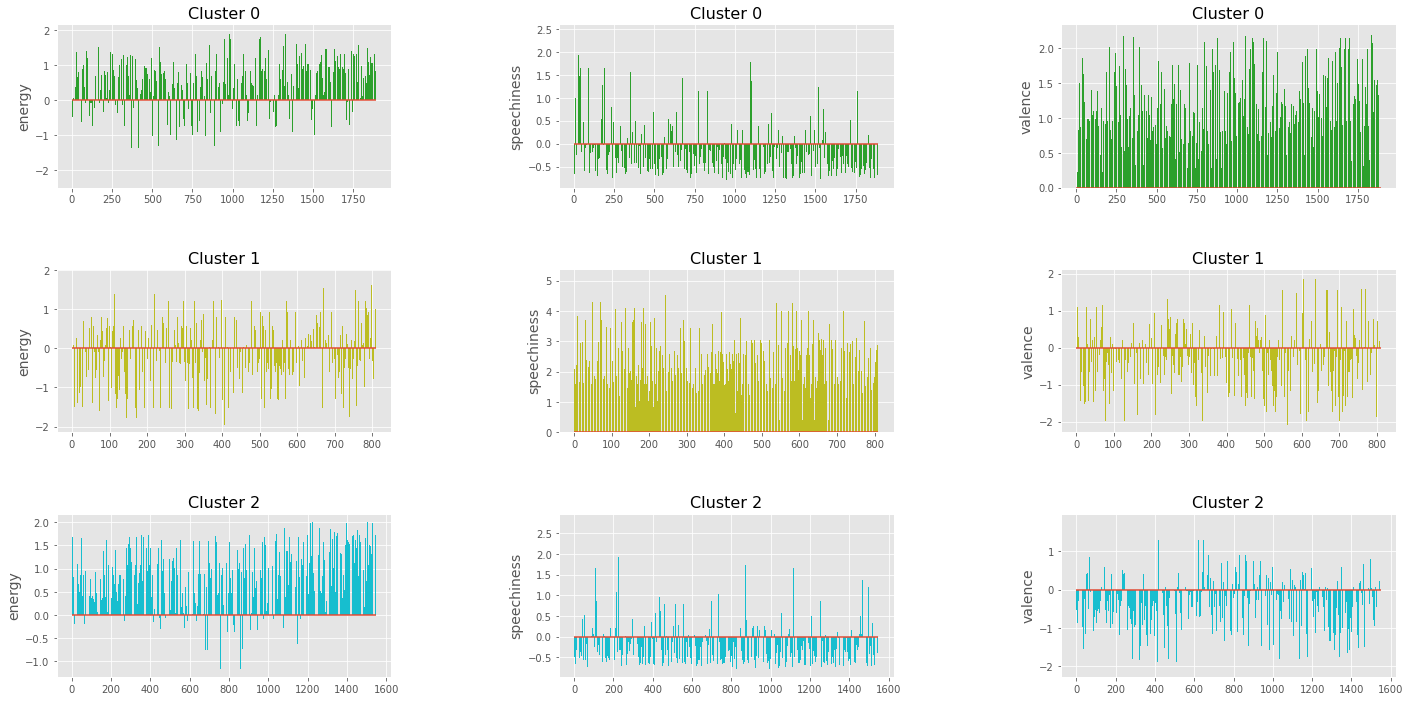

In [552]:
clusters = [0,1,2]
features = ["energy", "speechiness", "valence"]
colors = ['tab:green', 'tab:olive', 'tab:cyan']
dim = len(clusters)

fig, axes = plt.subplots(dim, dim, figsize=(24, 12))
i = 0
test_cluster = dfmodel1.loc[dfmodel1['clusters'] == clusters[0]]
for ax in (axes.flatten()):
    if i % dim == 0 and i != 0:
        test_cluster = dfmodel1.loc[dfmodel1['clusters'] == clusters[i // dim]]
    col = features[i % dim]
    y = test_cluster[col]
    x = [i for i in range(len(y))]
    ax.bar(x, y, color=colors[i//dim])
    ax.set_ylabel(col, fontsize=14)
    ax.set_title("Cluster " + str(clusters[i // dim]), fontsize=16)
    ax.hlines(np.mean(dfmodel1[col]), 0, len(y))
    plt.subplots_adjust(wspace=.5, hspace=.5)
    i += 1

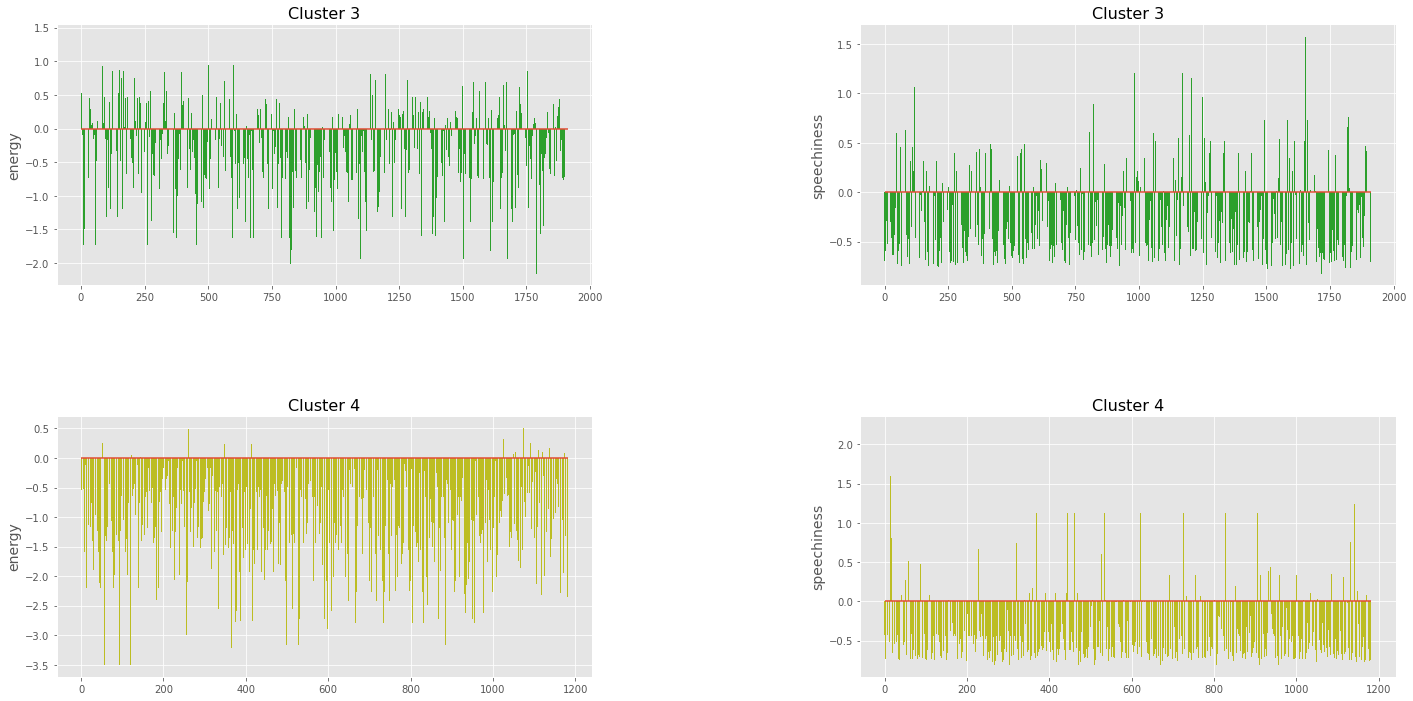

In [553]:
clusters = [3,4]
features = ["energy", "speechiness", "valence"]
colors = ['tab:green', 'tab:olive', 'tab:cyan']
dim = len(clusters)

fig, axes = plt.subplots(dim, dim, figsize=(24, 12))
i = 0
test_cluster = dfmodel1.loc[dfmodel1['clusters'] == clusters[0]]
for ax in (axes.flatten()):
    if i % dim == 0 and i != 0:
        test_cluster = dfmodel1.loc[dfmodel1['clusters'] == clusters[i // dim]]
    col = features[i % dim]
    y = test_cluster[col]
    x = [i for i in range(len(y))]
    ax.bar(x, y, color=colors[i//dim])
    ax.set_ylabel(col, fontsize=14)
    ax.set_title("Cluster " + str(clusters[i // dim]), fontsize=16)
    ax.hlines(np.mean(dfmodel1[col]), 0, len(y))
    plt.subplots_adjust(wspace=.5, hspace=.5)
    i += 1

# RESULTS- 1.1 - test

In [554]:

from wordcloud import WordCloud

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        max_words=30,
        max_font_size=40, 
        scale=3,
        collocation_threshold = 1,
        random_state= 4,
        width= 400,
        height=400
    ).generate(str(data))

    fig = plt.figure(figsize=(7, 7))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)

    plt.imshow(wordcloud)
    plt.show()


In [555]:
testresults = ("C0","C1","C2","C3","C4")

In [556]:
#lets see how it transfers to our test data

In [557]:
dfmodel1

artist                  songid  \
0               Ed Sheeran  7qiZfU4dY1lWllzX7mPBI3   
1               Ed Sheeran  6PCUP3dWmTjcTtXY02oFdT   
2       ZAYN, Taylor Swift  3NdDpSvN911VPGivFlV5d0   
3    The Weeknd, Daft Punk  5aAx2yezTd8zXrkmtKl66Z   
4             Clean Bandit  5knuzwU65gJK7IF5yJsuaW   
..                     ...                     ...   
91              Red Riders  1vI75BTbqaOR9yd9413Fcy   
92               Pearl Jam  4mWYx9wadNBVrgcTRzHSkB   
93                  Gossip  7anI9BA3qzGFhVBaogZ7xd   
94              Audioslave  7kKf7Lr1xufPFlgwjIDFVz   
95         Blue King Brown  0nnrBiyc3fF3PS1m0K4Gq1   

                                                title  year    energy  \
0                                        Shape of You     0  0.017077   
1                                  Castle on the Hill     0  1.088377   
2   I Don’t Wanna Live Forever (Fifty Shades Darke...     0 -1.166063   
3                                             Starboy     0 -0.324327   
4             Rockabye (feat. Sean Paul & Anne-Marie)     0  0.670452   
..                                                ...   ...       ...   
91                                Slide In Next To Me  2006 -1.454490   
92                                 World Wide Suicide  2006  1.824161   
93                     Standing in the Way of Control  2006  1.518075   
94                                      Original Fire  2006  1.771184   
95                           Come and Check your Head  2006  1.777070   

    loudness  speechiness   valence  liveness     tempo  danceability  \
0   1.379055    -0.187752  2.016553 -0.613969 -0.858429      1.192844   
1   0.646413     0.016366 -0.100360 -0.249905  0.578495     -1.342555   
2  -0.878003    -0.424616 -1.871204  1.186168 -0.048626      0.565960   
3  -0.292759     2.014975  0.194167 -0.296480  2.457835      0.189829   
4   0.994255    -0.492291  1.146778  0.060597 -0.637975      0.461479   
..       ...          ...       ...       ...       ...           ...   
91 -0.408851    -0.678945  0.824639 -0.459494  0.577685      0.259483   
92  1.082520    -0.246695  1.050136  0.852378  1.020286     -1.252005   
93  0.065518    -0.741162  2.103991  0.534113 -0.035078      0.308241   
94  1.529931    -0.462820  1.008719  1.551008  0.179779     -0.095751   
95  1.442101     0.628720  1.689813 -1.129403 -0.619125     -0.618155   

          C0        C1        C2        C3        C4  clusters  
0   0.270085  0.739320  0.722367  0.518215  0.876634         0  
1   0.459033  0.572393  0.067533  0.425539  0.544930         2  
2   0.762574  0.555408  0.552079  0.425585  0.166786         4  
3   0.646356  0.389322  0.598244  0.636387  0.751647         1  
4   0.138690  0.637141  0.478659  0.359513  0.703193         0  
..       ...       ...       ...       ...       ...       ...  
91  0.389369  0.603800  0.550475  0.341605  0.523454         3  
92  0.456351  0.746833  0.393424  0.634294  0.836783         2  
93  0.282990  0.809232  0.628519  0.611282  0.929300         0  
94  0.345128  0.704123  0.425340  0.550134  0.819432         0  
95  0.279810  0.700881  0.523845  0.554525  0.876583         0  

[7345 rows x 17 columns]

In [558]:
dfmodel2

artist                  songid  \
0               Ed Sheeran  7qiZfU4dY1lWllzX7mPBI3   
1               Ed Sheeran  6PCUP3dWmTjcTtXY02oFdT   
2       ZAYN, Taylor Swift  3NdDpSvN911VPGivFlV5d0   
3    The Weeknd, Daft Punk  5aAx2yezTd8zXrkmtKl66Z   
4             Clean Bandit  5knuzwU65gJK7IF5yJsuaW   
..                     ...                     ...   
91              Red Riders  1vI75BTbqaOR9yd9413Fcy   
92               Pearl Jam  4mWYx9wadNBVrgcTRzHSkB   
93                  Gossip  7anI9BA3qzGFhVBaogZ7xd   
94              Audioslave  7kKf7Lr1xufPFlgwjIDFVz   
95         Blue King Brown  0nnrBiyc3fF3PS1m0K4Gq1   

                                                title  year    energy  \
0                                        Shape of You     0  0.017077   
1                                  Castle on the Hill     0  1.088377   
2   I Don’t Wanna Live Forever (Fifty Shades Darke...     0 -1.166063   
3                                             Starboy     0 -0.324327   
4             Rockabye (feat. Sean Paul & Anne-Marie)     0  0.670452   
..                                                ...   ...       ...   
91                                Slide In Next To Me  2006 -1.454490   
92                                 World Wide Suicide  2006  1.824161   
93                     Standing in the Way of Control  2006  1.518075   
94                                      Original Fire  2006  1.771184   
95                           Come and Check your Head  2006  1.777070   

    loudness  speechiness   valence  liveness     tempo  danceability    C0%  \
0   1.379055    -0.187752  2.016553 -0.613969 -0.858429      1.192844  0.001   
1   0.646413     0.016366 -0.100360 -0.249905  0.578495     -1.342555  0.776   
2  -0.878003    -0.424616 -1.871204  1.186168 -0.048626      0.565960  0.023   
3  -0.292759     2.014975  0.194167 -0.296480  2.457835      0.189829  0.000   
4   0.994255    -0.492291  1.146778  0.060597 -0.637975      0.461479  0.003   
..       ...          ...       ...       ...       ...           ...    ...   
91 -0.408851    -0.678945  0.824639 -0.459494  0.577685      0.259483  0.522   
92  1.082520    -0.246695  1.050136  0.852378  1.020286     -1.252005  0.945   
93  0.065518    -0.741162  2.103991  0.534113 -0.035078      0.308241  0.008   
94  1.529931    -0.462820  1.008719  1.551008  0.179779     -0.095751  0.365   
95  1.442101     0.628720  1.689813 -1.129403 -0.619125     -0.618155  0.048   

      C1%    C2%    C3%    C4%  highest_%_clusters  
0   0.002  0.001  0.995  0.000                   3  
1   0.003  0.002  0.189  0.030                   0  
2   0.000  0.718  0.255  0.004                   2  
3   0.000  0.000  0.000  1.000                   4  
4   0.012  0.006  0.979  0.000                   3  
..    ...    ...    ...    ...                 ...  
91  0.291  0.009  0.151  0.027                   0  
92  0.000  0.001  0.011  0.042                   0  
93  0.001  0.003  0.987  0.001                   3  
94  0.000  0.101  0.529  0.005                   3  
95  0.000  0.060  0.887  0.005                   3  

[7345 rows x 17 columns]

In [567]:
dfyplot = dfmodel7.query("year != 0")

In [572]:
dfyplot2 = dfyplot.drop(["songid"],axis = 1)

In [559]:
dfmodel1wc = dfmodel1.copy()

In [618]:
dfmodel1wc = dfmodel1.drop(["songid"],axis=1)

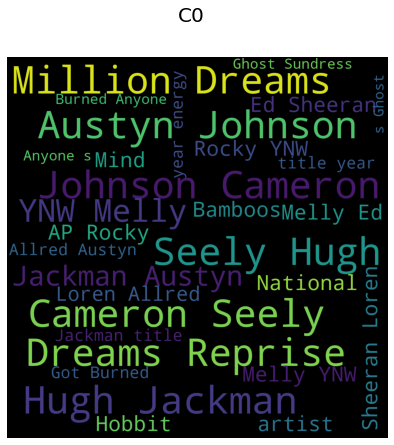

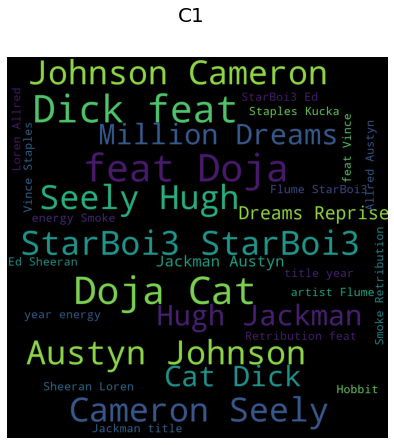

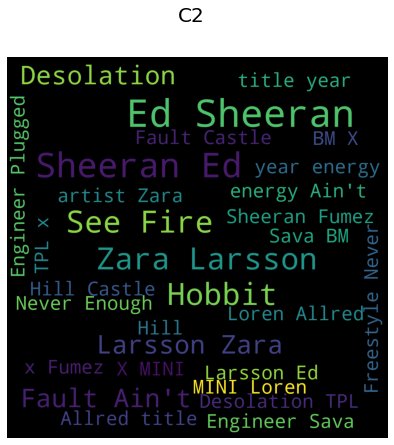

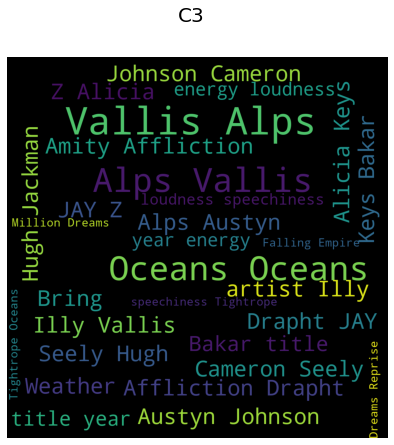

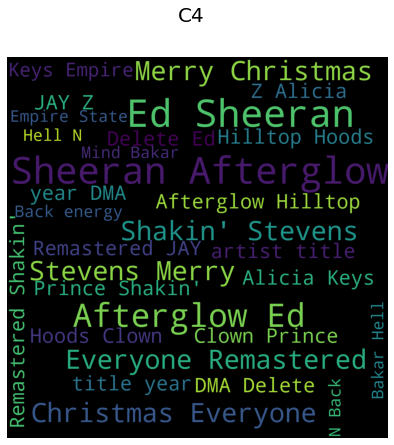

In [620]:
for cluster in testresults:
    show_wordcloud(dfmodel1wc.sort_values(by=cluster,ascending = True), title = cluster)

In [562]:
testresults2 = ("C0%","C1%","C2%","C3%","C4%")

In [563]:
dfmodel2wc = dfmodel2.drop(["songid"],axis=1)

In [576]:
dfmodel2wc = dfmodel2wc.query("year != 0")

In [577]:
dfmodel2wc 

artist                                      title  year  \
0     Billie Eilish                                    bad guy  2020   
1             Flume                               Rushing Back  2020   
2           Mallrat                                    Charlie  2020   
3       Tones And I                               Dance Monkey  2020   
4      Denzel Curry  Bulls On Parade - triple j Like A Version  2020   
..              ...                                        ...   ...   
91       Red Riders                        Slide In Next To Me  2006   
92        Pearl Jam                         World Wide Suicide  2006   
93           Gossip             Standing in the Way of Control  2006   
94       Audioslave                              Original Fire  2006   
95  Blue King Brown                   Come and Check your Head  2006   

      energy  loudness  speechiness   valence  liveness     tempo  \
0  -1.319106 -2.004575     3.030106  0.318421 -0.560407  0.582950   
1  -0.218374  0.701633    -0.210674 -0.574364 -0.110179  0.616747   
2  -0.353758 -0.193190    -0.733521 -0.951727 -0.580590 -0.154767   
3  -0.330213 -0.020138     0.015275  0.217177 -0.017028 -0.781078   
4   1.588710 -0.694951     2.397014  0.935087 -0.655111  2.094757   
..       ...       ...          ...       ...       ...       ...   
91 -1.454490 -0.408851    -0.678945  0.824639 -0.459494  0.577685   
92  1.824161  1.082520    -0.246695  1.050136  0.852378  1.020286   
93  1.518075  0.065518    -0.741162  2.103991  0.534113 -0.035078   
94  1.771184  1.529931    -0.462820  1.008719  1.551008  0.179779   
95  1.777070  1.442101     0.628720  1.689813 -1.129403 -0.619125   

    danceability    C0%    C1%    C2%    C3%    C4%  highest_%_clusters  
0       0.329137  0.000  0.000  0.119  0.000  0.881                   4  
1      -0.555467  0.283  0.183  0.011  0.490  0.033                   3  
2      -0.207198  0.005  0.913  0.016  0.065  0.001                   1  
3       1.192844  0.046  0.000  0.095  0.858  0.002                   3  
4      -2.965489  0.000  0.000  0.000  0.000  1.000                   4  
..           ...    ...    ...    ...    ...    ...                 ...  
91      0.259483  0.522  0.291  0.009  0.151  0.027                   0  
92     -1.252005  0.945  0.000  0.001  0.011  0.042                   0  
93      0.308241  0.008  0.001  0.003  0.987  0.001                   3  
94     -0.095751  0.365  0.000  0.101  0.529  0.005                   3  
95     -0.618155  0.048  0.000  0.060  0.887  0.005                   3  

[1345 rows x 16 columns]

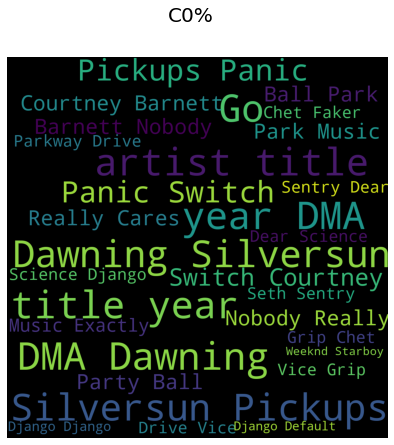

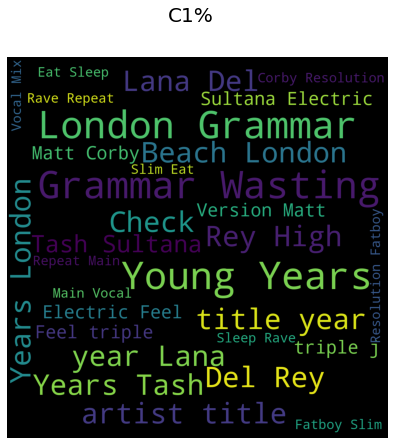

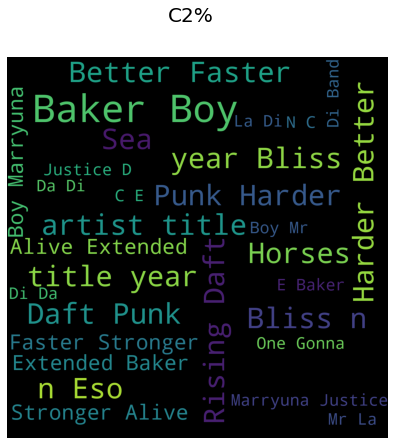

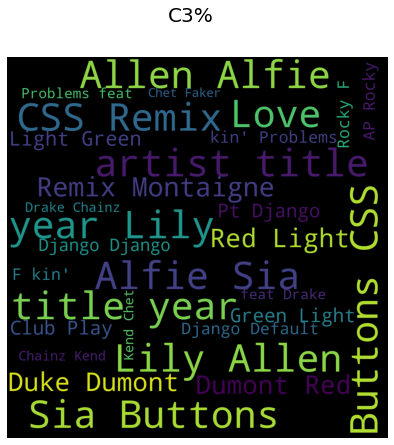

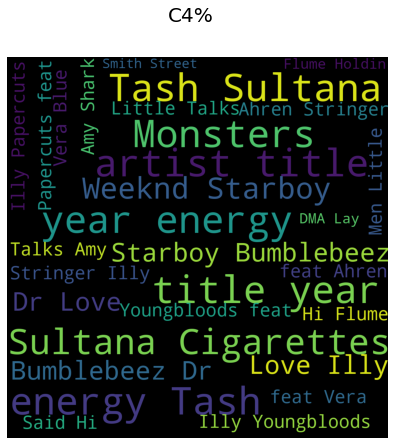

In [581]:
for cluster in testresults2:
    show_wordcloud(dfmodel2wc.sort_values(by=cluster,ascending = False), title = cluster)

# 1.1 - manually corroborating clustees

In [628]:
dtale.show(dfmodel1.sort_values(by="C1", ascending=True))

Executing shutdown due to inactivity...
Executing shutdown due to inactivity...
Executing shutdown due to inactivity...


2021-07-16 12:32:17,025 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...
Executing shutdown...
Executing shutdown...


2021-07-16 12:32:17,142 - INFO     - Executing shutdown...


In [580]:
dtale.show(dfmodel2.sort_values(by="C0%", ascending=False))

In [566]:
dfmodel1.dtypes

artist           object
songid           object
title            object
year              int64
energy          float64
loudness        float64
speechiness     float64
valence         float64
liveness        float64
tempo           float64
danceability    float64
C0              float64
C1              float64
C2              float64
C3              float64
C4              float64
clusters          int32
dtype: object

In [357]:
dfmodel7 = dfmodel1.copy()

In [358]:
dfyplot = dfmodel7.query("year != 0")

<bound method Artist.set of <AxesSubplot:xlabel='year'>>

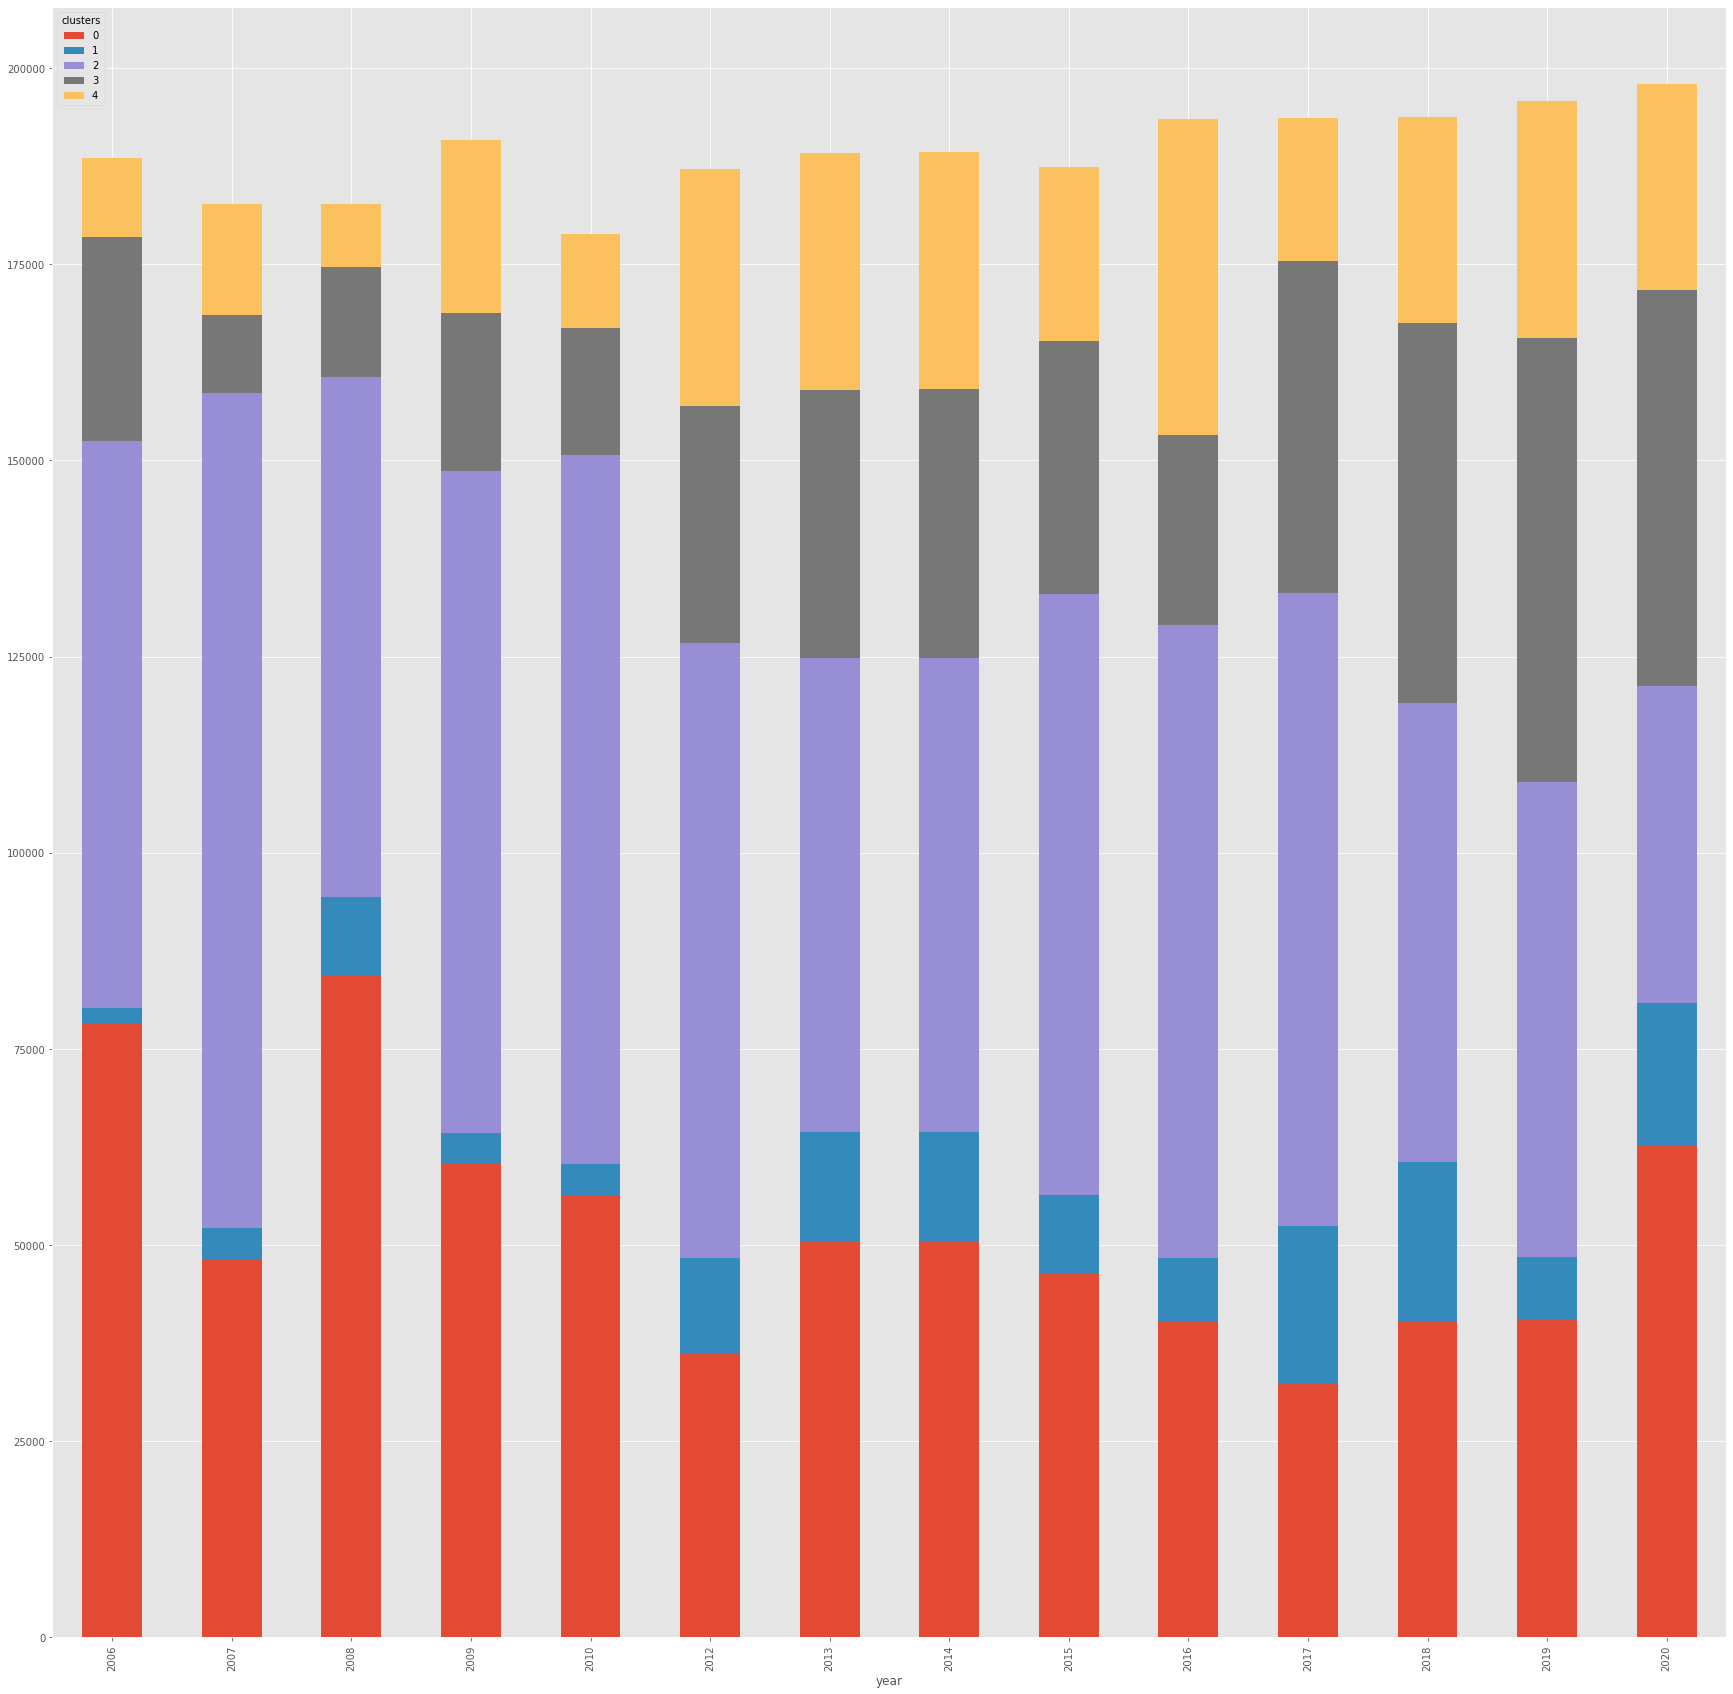

In [359]:
ctab = pd.crosstab(index =dfyplot["year"], 
                   columns = dfyplot["clusters"],
                   values = dfyplot["year"], aggfunc = "sum")
ax = ctab.plot.bar(stacked=True, 
              figsize = [30,30])
ax.set

In [584]:
dfmodel2wc.columns

Index(['artist', 'title', 'year', 'energy', 'loudness', 'speechiness',
       'valence', 'liveness', 'tempo', 'danceability', 'C0%', 'C1%', 'C2%',
       'C3%', 'C4%', 'highest_%_clusters'],
      dtype='object')

<bound method Artist.set of <AxesSubplot:xlabel='year'>>

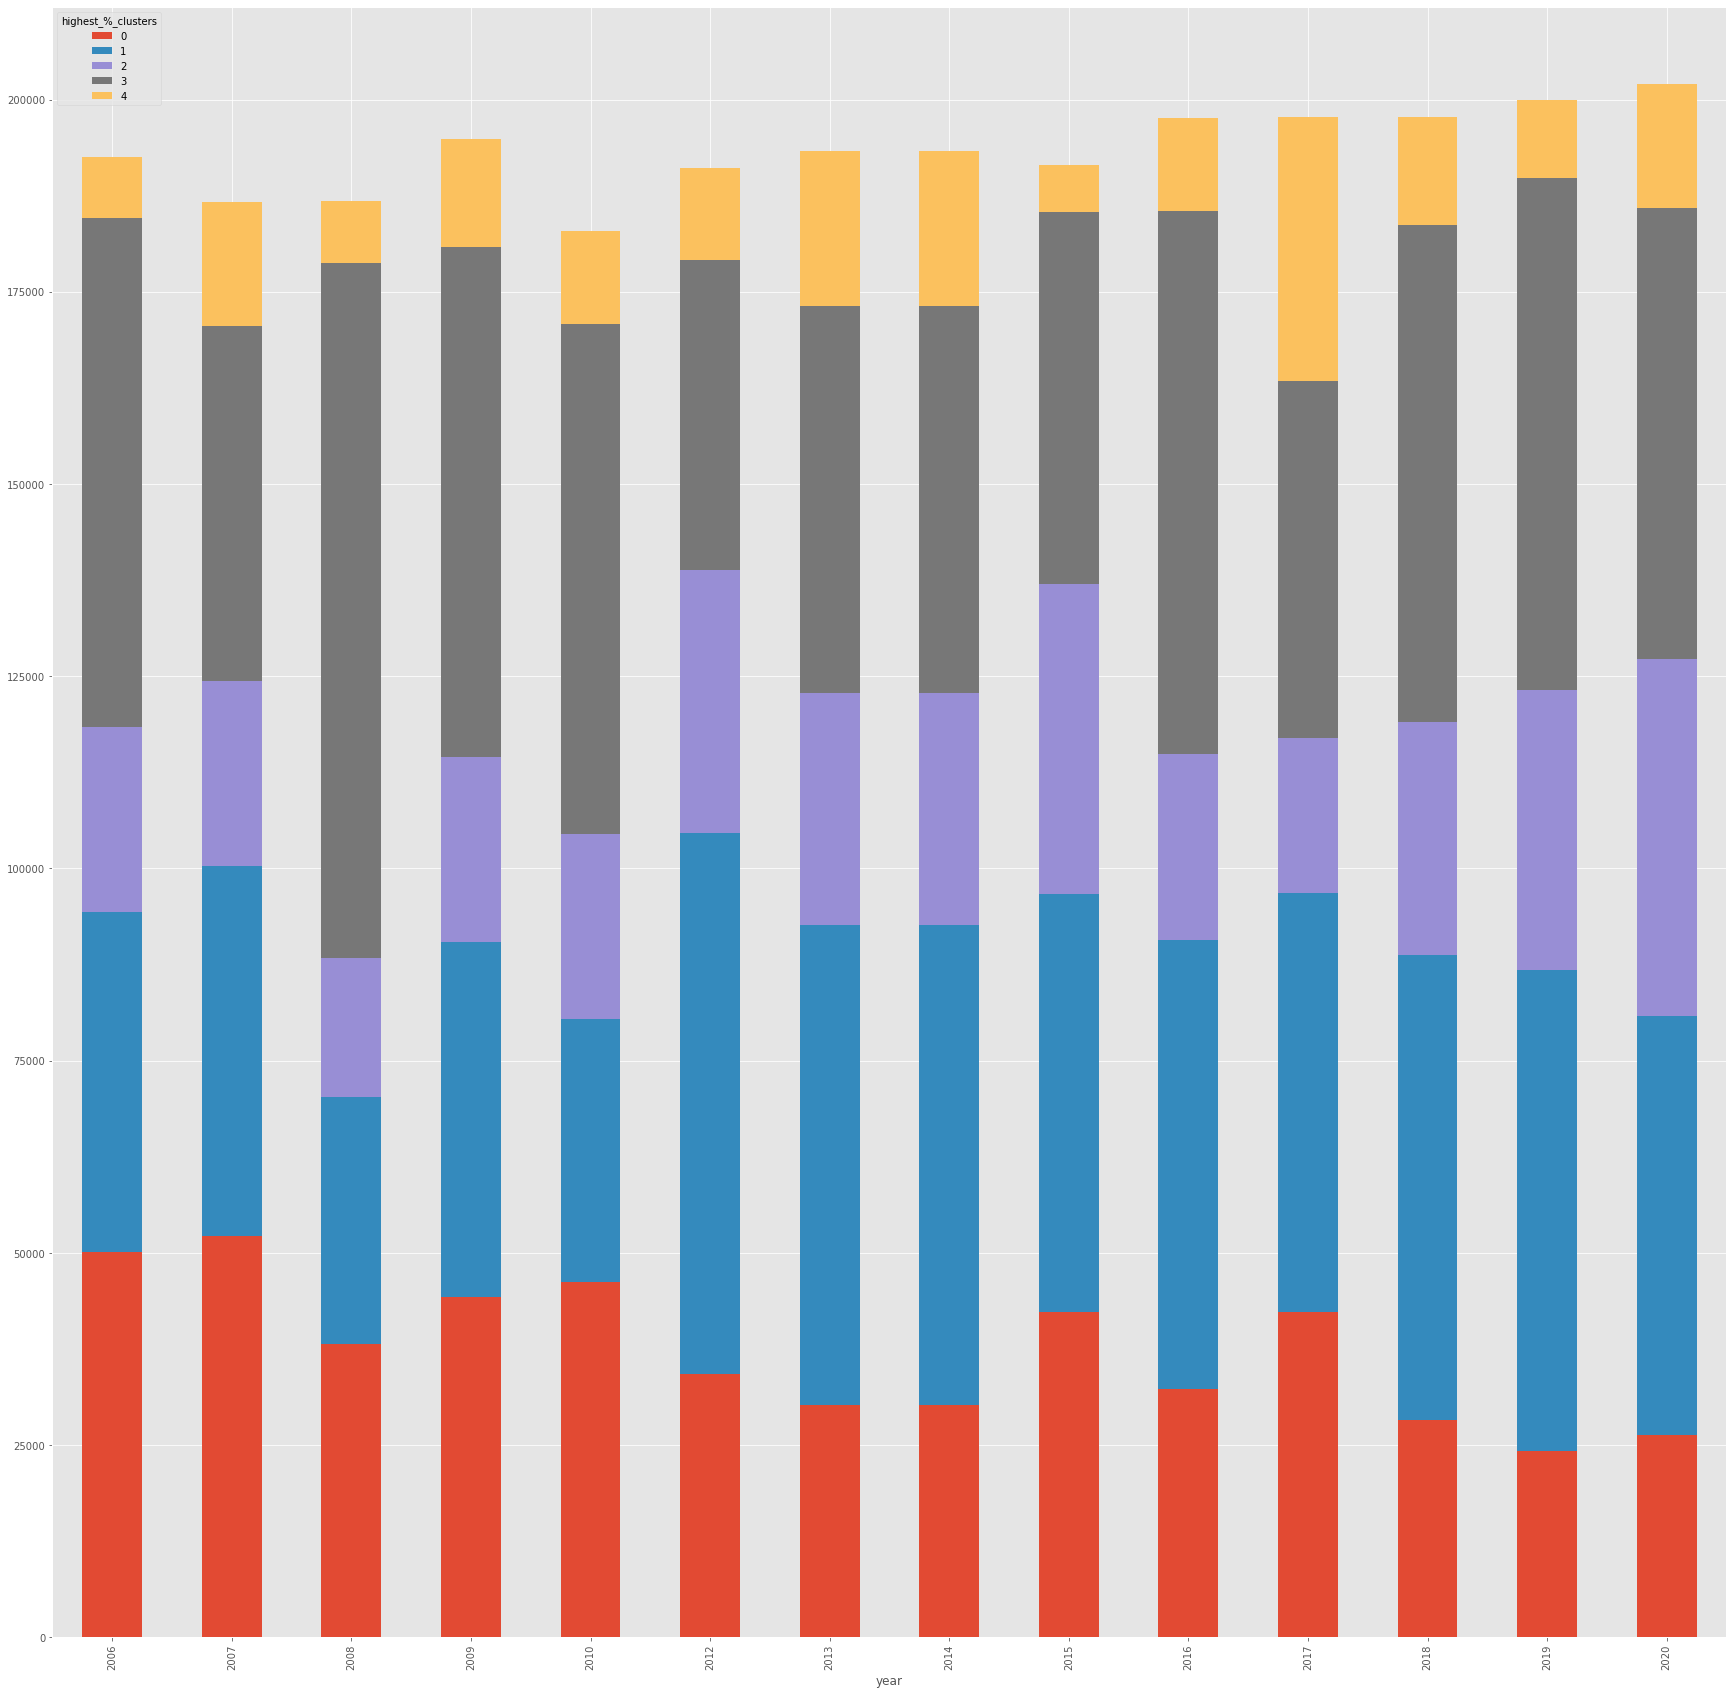

In [585]:
ctab = pd.crosstab(index =dfmodel2wc["year"], 
                   columns = dfmodel2wc["highest_%_clusters"],
                   values = dfmodel2wc["year"], aggfunc = "sum")
ax = ctab.plot.bar(stacked=True, 
              figsize = [30,30])
ax.set

# Recommender engine(To be continued...) 

In [ ]:
# \for i in range(n_clusters):
#     result = sp.user_playlist_create(user_config['username'], 'cluster'+str(i), public=True, collaborative=False, description='')
#     playlist_id = result['id']
#     songs = list(df.loc[df['Cluster'] == i]['track_URI'])
#     if len(songs) > 100:
#         sp.playlist_add_items(playlist_id, songs[:100])
#         sp.playlist_add_items(playlist_id, songs[100:])
#     else:
#         sp.playlist_add_items(playlist_id, songs)

In [360]:
import spotipy
import spotipy.util as util

from spotipy.oauth2 import SpotifyClientCredentials #To access authorised Spotify data
from tqdm import tqdm_notebook


client_id = '8226e5fb73ed41c299272b36f2618932'
client_secret = 'cb3c56836d004ce095e7fe2b70e398d3'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

In [361]:
cid = client_id
secret = client_secret

In [362]:
username = 1273402575

In [363]:
username = '1273402575' 
token = util.prompt_for_user_token(
    username=username,
    scope='playlist-modify-public', 
    client_id=cid, 
    client_secret=secret, 
    redirect_uri= "http://localhost/"
)
sp = spotipy.Spotify(auth=token)

In [592]:
i = 4

In [593]:
# for i in range(clusters):
result = sp.user_playlist_create(1273402575, 'cluster'+str(i), public=True, collaborative=False, description='')
playlist_id = result['id']
songs = list(dfmodel1.loc[dfmodel1['clusters'] == i]['songid'])
if len(songs) > 100:
    sp.playlist_add_items(playlist_id, songs[:100])
    sp.playlist_add_items(playlist_id, songs[100:])
else:
    sp.playlist_add_items(playlist_id, songs)

2021-07-14 19:24:16,011 - ERROR    - HTTP Error for POST to https://api.spotify.com/v1/playlists/0tOgTMu1hbEqdqVzKAAlf9/tracks returned 413 due to error


SpotifyException: http status: 413, code:-1 - https://api.spotify.com/v1/playlists/0tOgTMu1hbEqdqVzKAAlf9/tracks:
 error, reason: None